# UNEMPLOYMENT ANALYSIS WITH PYTHON

# About the Dataset

The kaggle dataset "Unemployment In India" was used.This dataset tells the narrative of how the Covid-19 lockdown affects employment opportunities and how the unemployment rate rises. There are two subdatasets in this dataset.


1. India's unemployment
2. Employment Rate Through November 2020

From these two datasets, we must determine

1. Covid-19's impact on employment
2. The potential extent of the unemployment rate

The dataset includes 7 columns total.
Here, exploratory data analysis must be done.

# Unemployment in India Dataset

# Data Preparation

In [61]:
# Importing Basis Libraries

import numpy as np
# numpy is aliased as np
import pandas as pd
# pandas is aliased as pd
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns
sns.set_palette('viridis')
import datetime

import warnings
warnings.filterwarnings("ignore")

In [62]:
# Loading the Dataset
df = pd.read_csv("/content/Unemployment in India.csv")
df

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
763                  NaN                                       NaN    NaN  
764                  NaN                                       NaN    NaN  
765                  NaN                                       NaN    NaN  
766                  NaN                                       NaN    NaN  
767                  NaN                                       NaN    NaN  

[768 rows x 7 columns]

In [63]:
# showing first 5 rows
df.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural

In [64]:
# showing last 5 rows
df.tail()

Region  Date  Frequency   Estimated Unemployment Rate (%)  \
763    NaN   NaN        NaN                               NaN   
764    NaN   NaN        NaN                               NaN   
765    NaN   NaN        NaN                               NaN   
766    NaN   NaN        NaN                               NaN   
767    NaN   NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%) Area  
763                  NaN                                       NaN  NaN  
764                  NaN                                       NaN  NaN  
765                  NaN                                       NaN  NaN  
766                  NaN                                       NaN  NaN  
767                  NaN                                       NaN  NaN

In [65]:
#  Showing dimension of the dataset
df.shape
# No. of Rows = 768
# No. of Columns = 7

(768, 7)

In [66]:
# showing columns in the dataset
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [67]:
# Removing starting and ending spaces from column names
df.columns = df.columns.str.strip()
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# Data Preprocessing and Data Cleaning

In [68]:
# showing data types of columns
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

Handling Duplicated Values

In [69]:
# Checking for duplicated values
df.duplicated().sum()

27

In [70]:
#  Dropping duplicated values
df.drop_duplicates(inplace=True)
df

Region         Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019   Monthly                             3.65   
1    Andhra Pradesh   30-06-2019   Monthly                             3.05   
2    Andhra Pradesh   31-07-2019   Monthly                             3.75   
3    Andhra Pradesh   31-08-2019   Monthly                             3.32   
4    Andhra Pradesh   30-09-2019   Monthly                             5.17   
..              ...          ...       ...                              ...   
749     West Bengal   29-02-2020   Monthly                             7.55   
750     West Bengal   31-03-2020   Monthly                             6.67   
751     West Bengal   30-04-2020   Monthly                            15.63   
752     West Bengal   31-05-2020   Monthly                            15.22   
753     West Bengal   30-06-2020   Monthly                             9.86   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0            11999139.0                                    43.24  Rural  
1            11755881.0                                    42.05  Rural  
2            12086707.0                                    43.50  Rural  
3            12285693.0                                    43.97  Rural  
4            12256762.0                                    44.68  Rural  
..                  ...                                      ...    ...  
749          10871168.0                                    44.09  Urban  
750          10806105.0                                    43.34  Urban  
751           9299466.0                                    41.20  Urban  
752           9240903.0                                    40.67  Urban  
753           9088931.0                                    37.57  Urban  

[741 rows x 7 columns]

In [71]:
# Checking for duplicated values
df.duplicated().any()

False

Null Values Treatment


In [72]:
# checking for null values
df.isna().sum()

Region                                     1
Date                                       1
Frequency                                  1
Estimated Unemployment Rate (%)            1
Estimated Employed                         1
Estimated Labour Participation Rate (%)    1
Area                                       1
dtype: int64

In [73]:
# Dropping Null values
df.dropna(inplace=True)

# Checking for null values
df.isnull().any()

Region                                     False
Date                                       False
Frequency                                  False
Estimated Unemployment Rate (%)            False
Estimated Employed                         False
Estimated Labour Participation Rate (%)    False
Area                                       False
dtype: bool

As there is only single null values found in the datset so we will drop this null value.

In [74]:
df.nunique()

Region                                      28
Date                                        14
Frequency                                    2
Estimated Unemployment Rate (%)            624
Estimated Employed                         740
Estimated Labour Participation Rate (%)    626
Area                                         2
dtype: int64

In [75]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [76]:
df['Date'].unique()

array([' 31-05-2019', ' 30-06-2019', ' 31-07-2019', ' 31-08-2019',
       ' 30-09-2019', ' 31-10-2019', ' 30-11-2019', ' 31-12-2019',
       ' 31-01-2020', ' 29-02-2020', ' 31-03-2020', ' 30-04-2020',
       ' 31-05-2020', ' 30-06-2020'], dtype=object)

In [77]:
df['Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [78]:
df['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

Data Cleaning in Frequency Column

In [79]:
# Changing Data Of Frequency Column
df['Frequency'].replace(' Monthly','Monthly',inplace=True)
df['Frequency'].unique()

array(['Monthly'], dtype=object)

Data Cleaning in Date column

In [80]:
# Changing Data Type of Date Column
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

In [81]:
# Extracting Year , Month, and Day from Date Column
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df.head()

Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  Year  \
0          11999139.0                                    43.24  Rural  2019   
1          11755881.0                                    42.05  Rural  2019   
2          12086707.0                                    43.50  Rural  2019   
3          12285693.0                                    43.97  Rural  2019   
4          12256762.0                                    44.68  Rural  2019   

   Month  Day  
0      5   31  
1      6   30  
2      7   31  
3      8   31  
4      9   30

In [82]:
# Dropping Date Column
df.drop(['Date'],axis = 1, inplace=True)
df.columns

Index(['Region', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Year', 'Month', 'Day'],
      dtype='object')

In [83]:
# showing info. about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Frequency                                740 non-null    object 
 2   Estimated Unemployment Rate (%)          740 non-null    float64
 3   Estimated Employed                       740 non-null    float64
 4   Estimated Labour Participation Rate (%)  740 non-null    float64
 5   Area                                     740 non-null    object 
 6   Year                                     740 non-null    int64  
 7   Month                                    740 non-null    int64  
 8   Day                                      740 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 57.8+ KB


In [84]:
# Showing statistical information about numerical columns of dataset
df.describe()

Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)         Year       Month  \
count                               740.000000   740.000000  740.000000   
mean                                 42.630122  2019.418919    6.390541   
std                                   8.111094     0.493716    3.235070   
min                                  13.330000  2019.000000    1.000000   
25%                                  38.062500  2019.000000    4.000000   
50%                                  41.160000  2019.000000    6.000000   
75%                                  45.505000  2020.000000    9.000000   
max                                  72.570000  2020.000000   12.000000   

              Day  
count  740.000000  
mean    30.502703  
std      0.627509  
min     29.000000  
25%     30.000000  
50%     31.000000  
75%     31.000000  
max     31.000000

In [85]:
# Showing statistical information about categorical columns of dataset
df.describe(include='O')

Region Frequency   Area
count              740       740    740
unique              28         1      2
top     Andhra Pradesh   Monthly  Urban
freq                28       740    381

Extract all categorical columns and numerical columns

In [86]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['Region', 'Frequency', 'Area'], dtype='object')
Index(['Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Year', 'Month', 'Day'],
      dtype='object')


1. Area Column

In [87]:
df['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

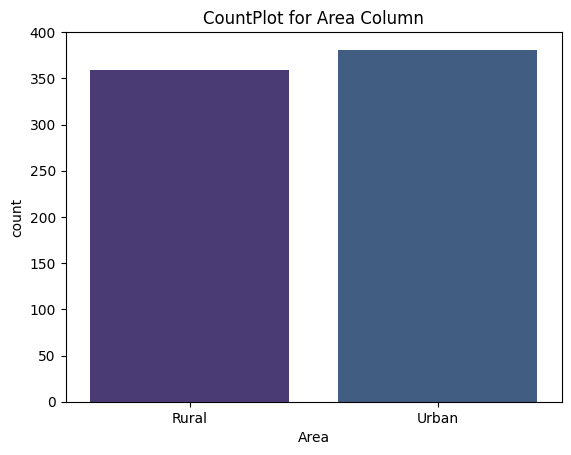

In [88]:
# Plotting CountPlot for Area Column
sns.countplot(x=df['Area'])
plt.title('CountPlot for Area Column')
plt.show()

This Plot clearly shows most of the people belong to urban area

In [89]:
# Showing Percentage Distribution of Average Estimated Unemployment Rate Area wise
d1 = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
d1

Area
Rural    10.324791
Urban    13.166614
Name: Estimated Unemployment Rate (%), dtype: float64

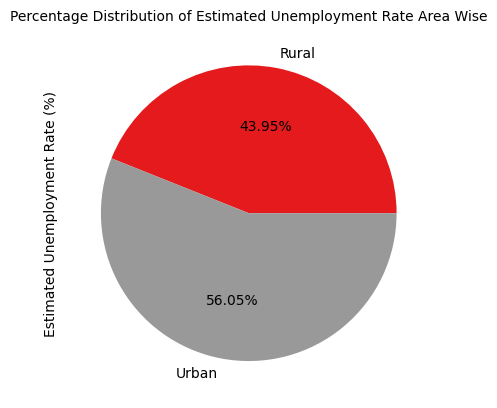

In [90]:
d1.plot(kind='pie',autopct='%.2f%%',cmap='Set1')
plt.title('Percentage Distribution of Estimated Unemployment Rate Area Wise',size=10)
plt.show()

This Plot clearly shows around 56.05 % Unemployment Rate exist in urban area which is more than rural area.

In [91]:
# Showing Percentage Distribution of Average Estimated Labour Participation Rate Area wise
d2 = df.groupby('Area')['Estimated Labour Participation Rate (%)'].mean()
d2

Area
Rural    44.464819
Urban    40.901365
Name: Estimated Labour Participation Rate (%), dtype: float64

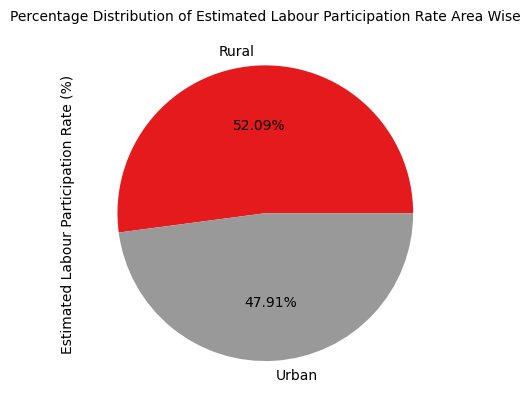

In [92]:
d2.plot(kind='pie',autopct='%.2f%%',cmap='Set1')
plt.title('Percentage Distribution of Estimated Labour Participation Rate Area Wise',size=10)
plt.show()

This plot clearly shows Labour participation Rate is more in rural area than urban area which is around 52.09 %.

In [93]:
# Showing Percentage Distribution of Average Estimated Employed Area wise
d3 = df.groupby('Area')['Estimated Employed'].mean()
d3

Area
Rural    1.019285e+07
Urban    4.388626e+06
Name: Estimated Employed, dtype: float64

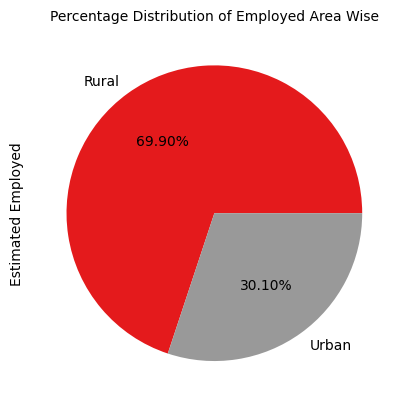

In [94]:
d3.plot(kind='pie',autopct='%.2f%%',cmap='Set1')
plt.title('Percentage Distribution of Employed Area Wise',size=10)
plt.show()

This Plot clearly shows that most of the people employed are from rural area.

2. Estimated Unemployment Rate (%) column

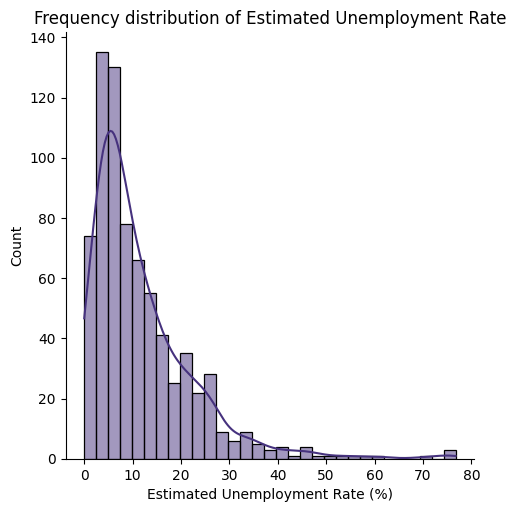

In [95]:
# Frequency distribution of Estimated Unemployment Rate
sns.displot(df['Estimated Unemployment Rate (%)'],kde=True)
plt.title('Frequency distribution of Estimated Unemployment Rate')
plt.show()

3. Estimated Labour Participation Rate (%) column

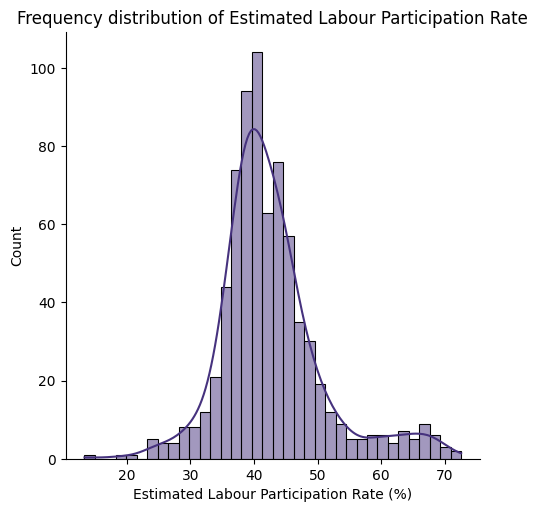

In [96]:
# Frequency distribution of Estimated Labour Participation Rate
sns.displot(df['Estimated Labour Participation Rate (%)'],kde=True)
plt.title('Frequency distribution of Estimated Labour Participation Rate')
plt.show()

4. Estimated Employed column

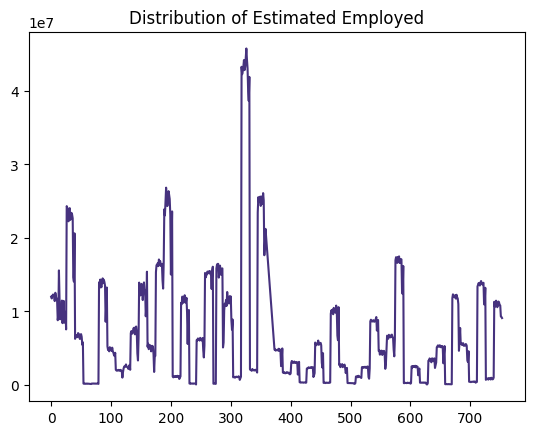

In [97]:
# Distribution of Estimated Employed
plt.plot(df['Estimated Employed'])
plt.title('Distribution of Estimated Employed')
plt.show()

This plot clearly shows that most of the people employed range between 300-350.

5. Year column

In [98]:
d4 = df['Year'].value_counts()
d4

2019    430
2020    310
Name: Year, dtype: int64

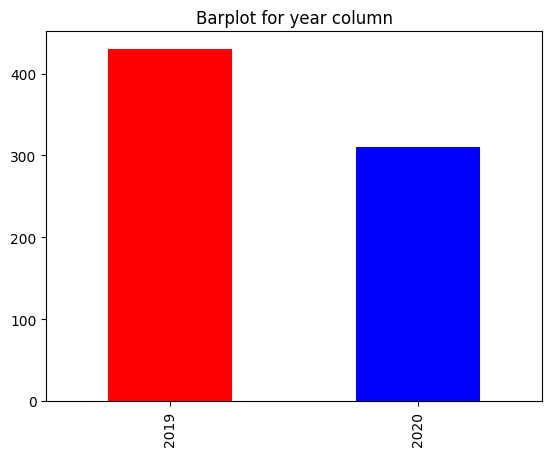

In [99]:
# showing countplot for year column
d4.plot(kind='bar',color=['r','b'])
plt.title('Barplot for year column')
plt.show()

This Plot clearly shows that most of the people unemployed in the year 2019.

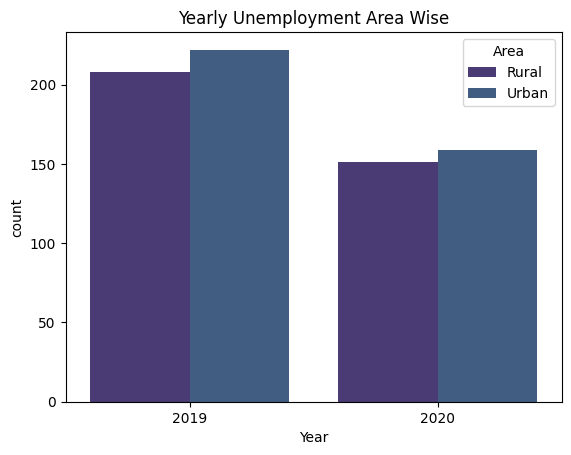

In [100]:
# Showing Yearly Unemployment level area wise
sns.countplot(x=df['Year'],hue=df['Area'])
plt.title('Yearly Unemployment Area Wise')
plt.show()

This plot shows both the years Urban area have more unemployment level

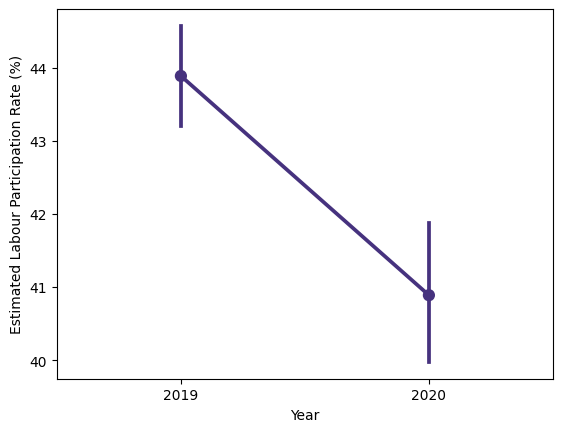

In [101]:
# showing Estimated labour Participation rate yearly wise
sns.pointplot(y=df['Estimated Labour Participation Rate (%)'],x=df['Year'])
plt.show()

Labour Participate Rate is more in 2019 which is around 44 %.

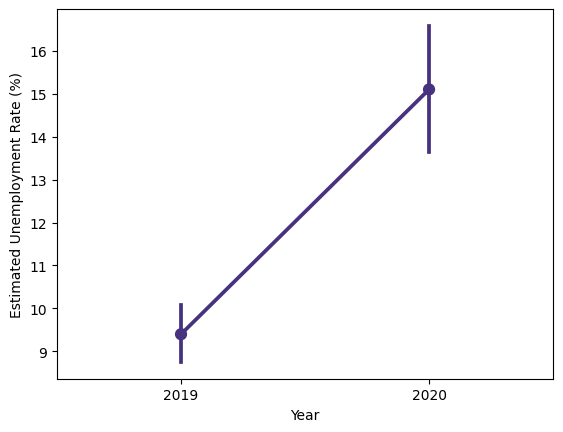

In [102]:
# showing Estimated Unemployment Rate (%) yearly wise
sns.pointplot(y=df['Estimated Unemployment Rate (%)'],x=df['Year'])
plt.show()

Estimated Unemployment Rate is more in 2020 which is around 15 %.

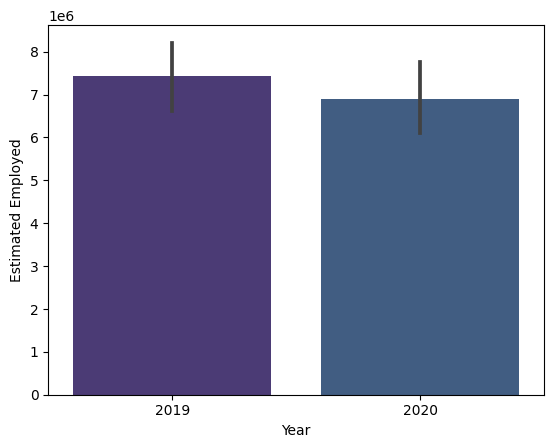

In [103]:
# showing Estimated Employed yearly wise
sns.barplot(y=df['Estimated Employed'],x=df['Year'])
plt.show()

This plot shows that most people are employed in 2019.

6. Day Column

In [104]:
df['Day'].value_counts()

31    425
30    262
29     53
Name: Day, dtype: int64

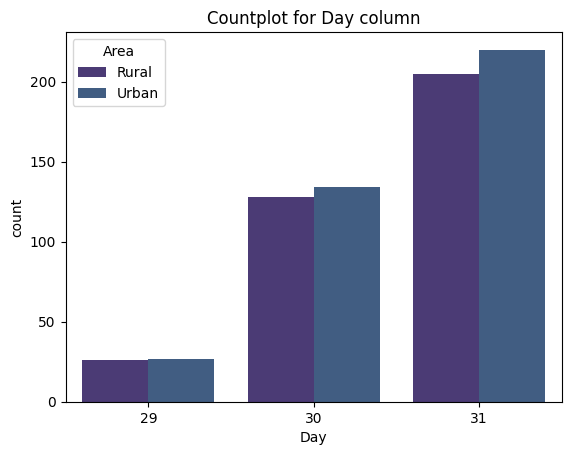

In [105]:
# Showing Daily Unemployment level area wise
sns.countplot(x=df['Day'],hue=df['Area'])
plt.title('Countplot for Day column')
plt.show()

This Plot shows On 31 Unemployment Level is High in both the areas

   Day  Estimated Unemployment Rate (%)  Estimated Employed  \
0   29                         9.964717        7.603996e+06   
1   30                        12.659275        7.017824e+06   
2   31                        11.478165        7.269691e+06   

   Estimated Labour Participation Rate (%)         Year     Month  
0                                43.723019  2020.000000  2.000000  
1                                41.648473  2019.385496  7.255725  
2                                43.098988  2019.367059  6.404706  


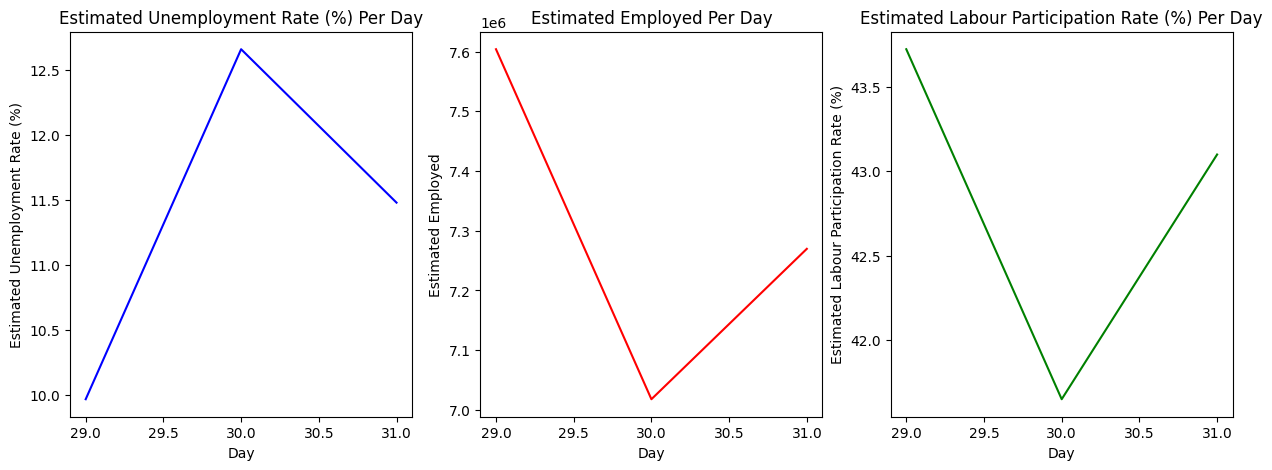

In [106]:
# Plotting the graphs of average of 'Estimated Unemployment Rate (%)', 'Estimated Employed','Estimated Labour Participation Rate (%)' per day
day_df = df.groupby('Day').mean().reset_index()
print(day_df)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(day_df['Day'], day_df['Estimated Unemployment Rate (%)'], 'b')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Estimated Unemployment Rate (%)')
axes[0].set_title('Estimated Unemployment Rate (%) Per Day')

axes[1].plot(day_df['Day'], day_df['Estimated Employed'], 'r')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_title('Estimated Employed Per Day')

axes[2].plot(day_df['Day'], day_df['Estimated Labour Participation Rate (%)'], 'g')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_title('Estimated Labour Participation Rate (%) Per Day')

plt.show()

This Plot displays:

Unemployment Rate in A
1. on 29 In general, the unemployment rate is rising.
2. The unemployment rate reached its peak on 30 and is now over 12.5%.
3. After age 30, it starts to fall to 11.5%.

B) Employed Per Day 1. On the 29th, it reaches its maximum Point, after which it continues to fall.
2. It drops to its lowest level on the 30th, which is 7%.
3. It starts to rise by 3% after 30.

Labour Force Participation Rate
1. It reaches its peak on the 29th and then begins falling.
2. It drops to 40% on the 30th, which is the lowest point.
3. It starts to rise by 3% after 30.


7. Month Column

In [107]:
df['Month'].value_counts().sort_values()

4      51
9      52
3      52
8      53
12     53
1      53
2      53
7      54
10     55
11     55
6     104
5     105
Name: Month, dtype: int64

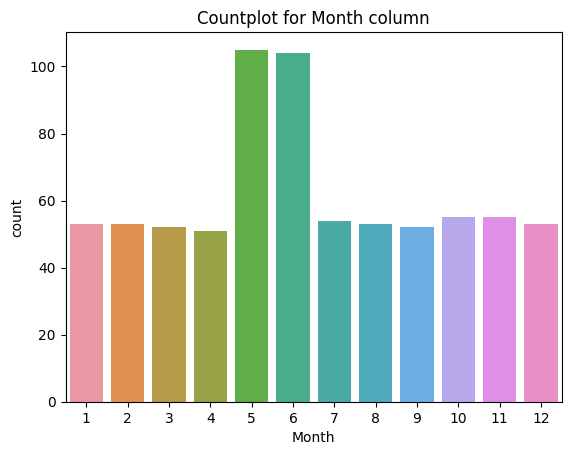

In [108]:
# Plotting CountPlot for the Month column
sns.countplot(x=df['Month'])
plt.title('Countplot for Month column')
plt.show()

May has the highest Unemployment level

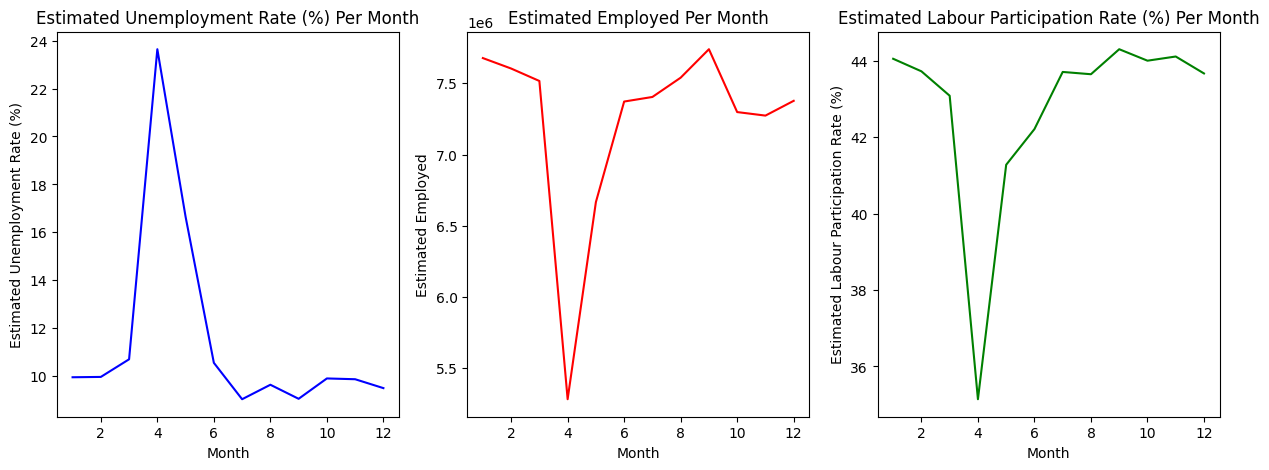

In [109]:
# Plotting the graphs of average of  'Estimated Unemployment Rate (%)', 'Estimated Employed','Estimated Labour Participation Rate (%)' per month
month_df = df.groupby('Month').mean().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(month_df['Month'], month_df['Estimated Unemployment Rate (%)'], 'b')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Estimated Unemployment Rate (%)')
axes[0].set_title('Estimated Unemployment Rate (%) Per Month')

axes[1].plot(month_df['Month'], month_df['Estimated Employed'], 'r')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_title('Estimated Employed Per Month')

axes[2].plot(month_df['Month'], month_df['Estimated Labour Participation Rate (%)'], 'g')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_title('Estimated Labour Participation Rate (%) Per Month')

plt.show()

Getting Information

1. The average estimated unemployment rate reaches its highest point in April before steadily dropping after that.
2. The Average Estimated Employment is at its lowest point in April, rises, and peaks in September.
3. The average estimated labour force participation rate reaches its lowest point in April, rises, and peaks in September.


8. Region Column

In [110]:
df['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

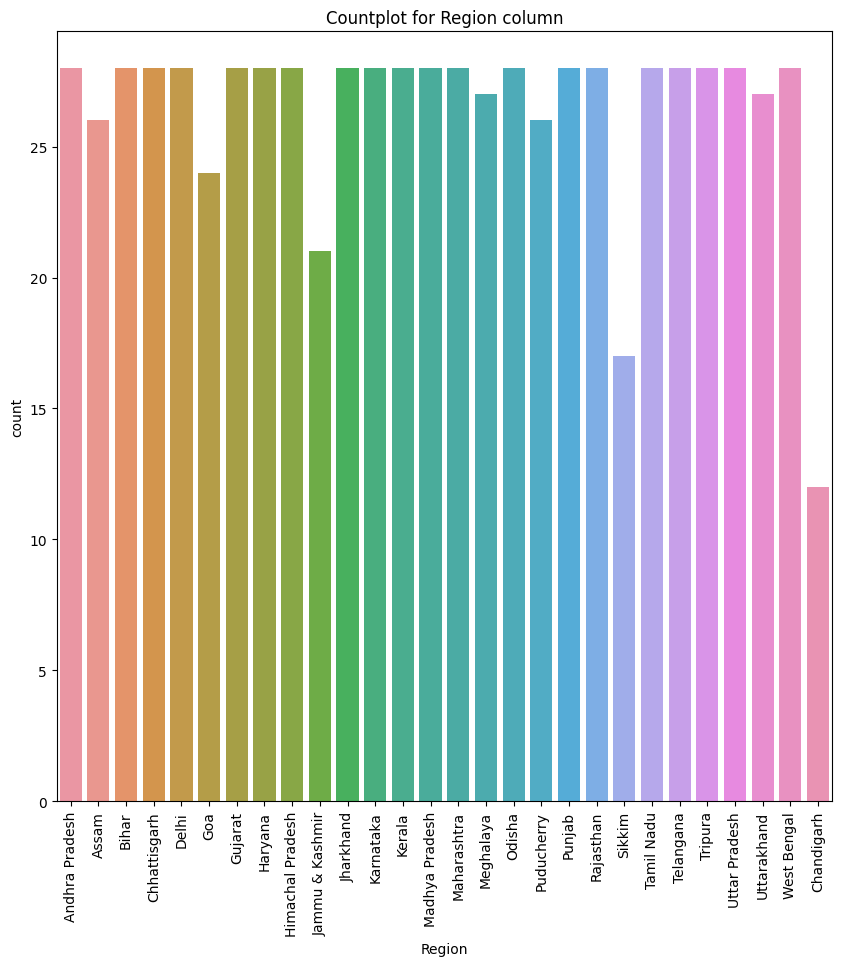

In [111]:
# Plotting Unemployment level Region Wise
plt.figure(figsize=(10,10))
sns.countplot(x=df['Region'])
plt.title('Countplot for Region column')
plt.xticks(rotation=90)
plt.show()

From this Plot we can conclude the 5 Regions having lowest unemployment level.

1. Chandigarh
2. Sikkim
3. Jammu & kashmir
4. Goa
5. Assam


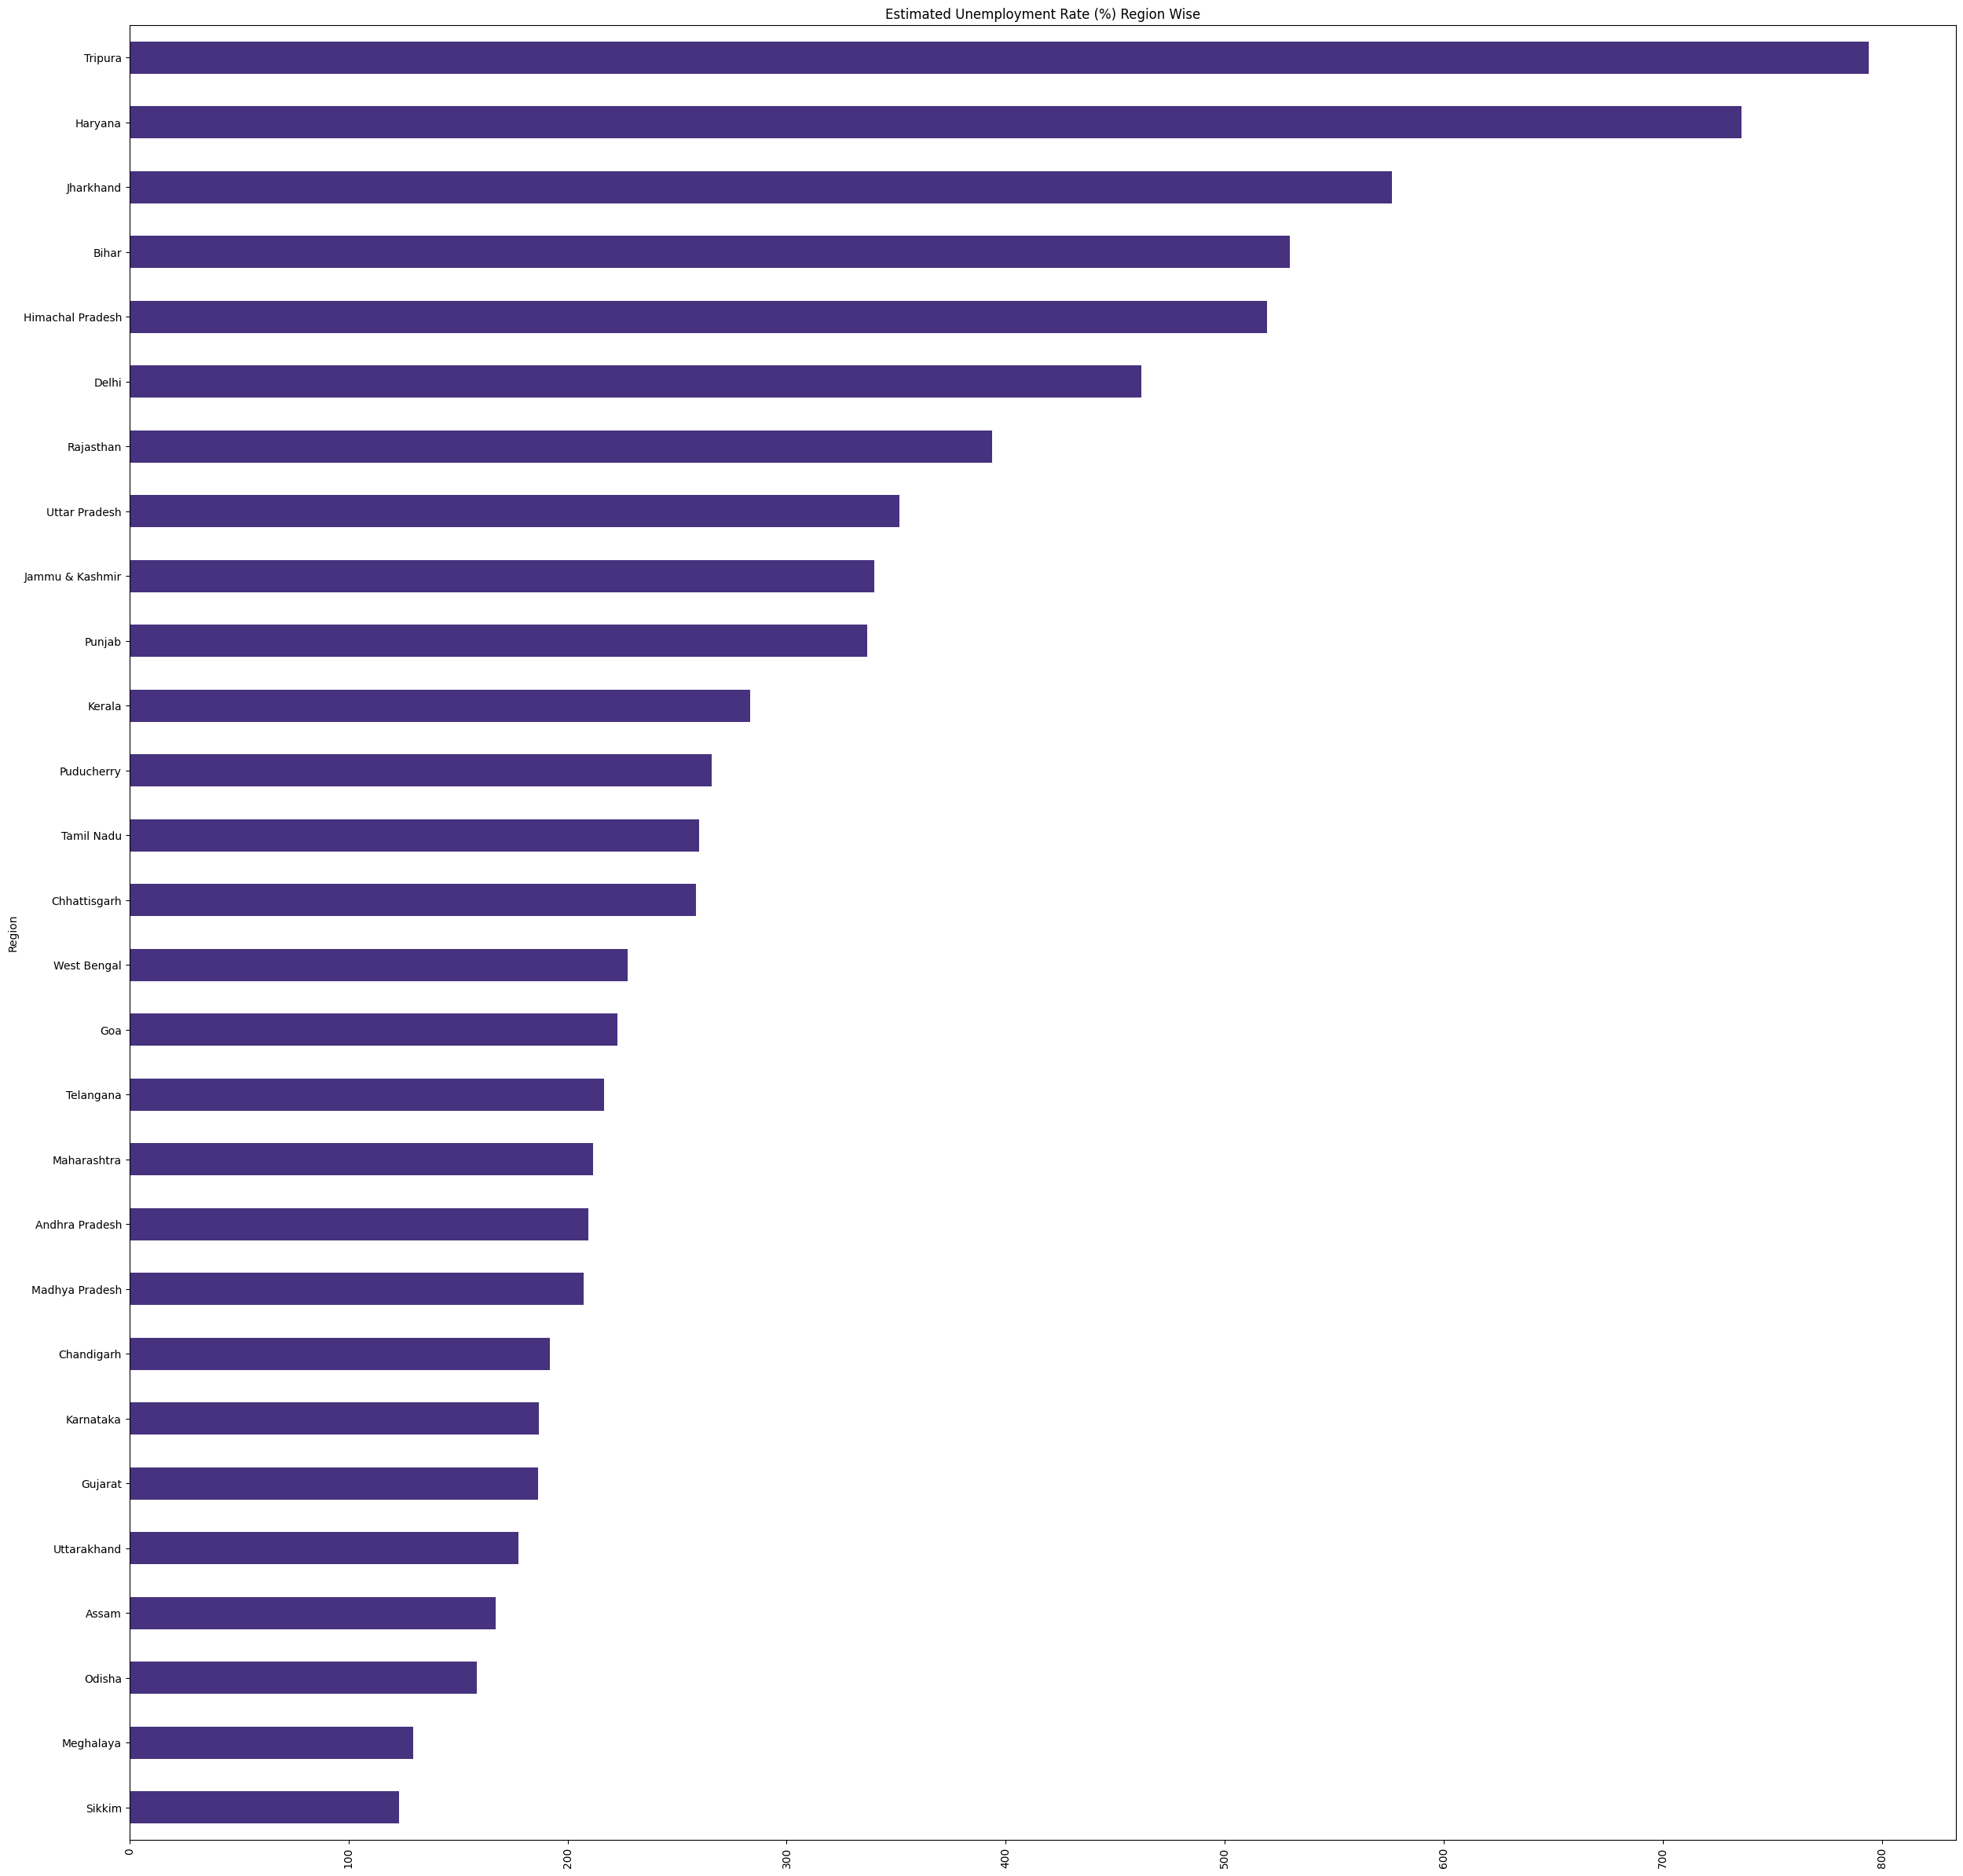

In [112]:
#  Getting the Highest Estimated Unemployment Rate (%) Region Wise
a1=df.groupby(['Region'])['Estimated Unemployment Rate (%)'].sum().sort_values(ascending=True)
plt.figure(figsize=(30,30))
a1.plot(kind='barh')
plt.title('Estimated Unemployment Rate (%) Region Wise')
plt.xticks(rotation=90)
plt.show()

The Top 5 Regions having Highest Estimated Unemployment Rate.

1. Tripura
2. Haryana
3. Jarkhand
4. Bihar
5. Himachal Pradesh

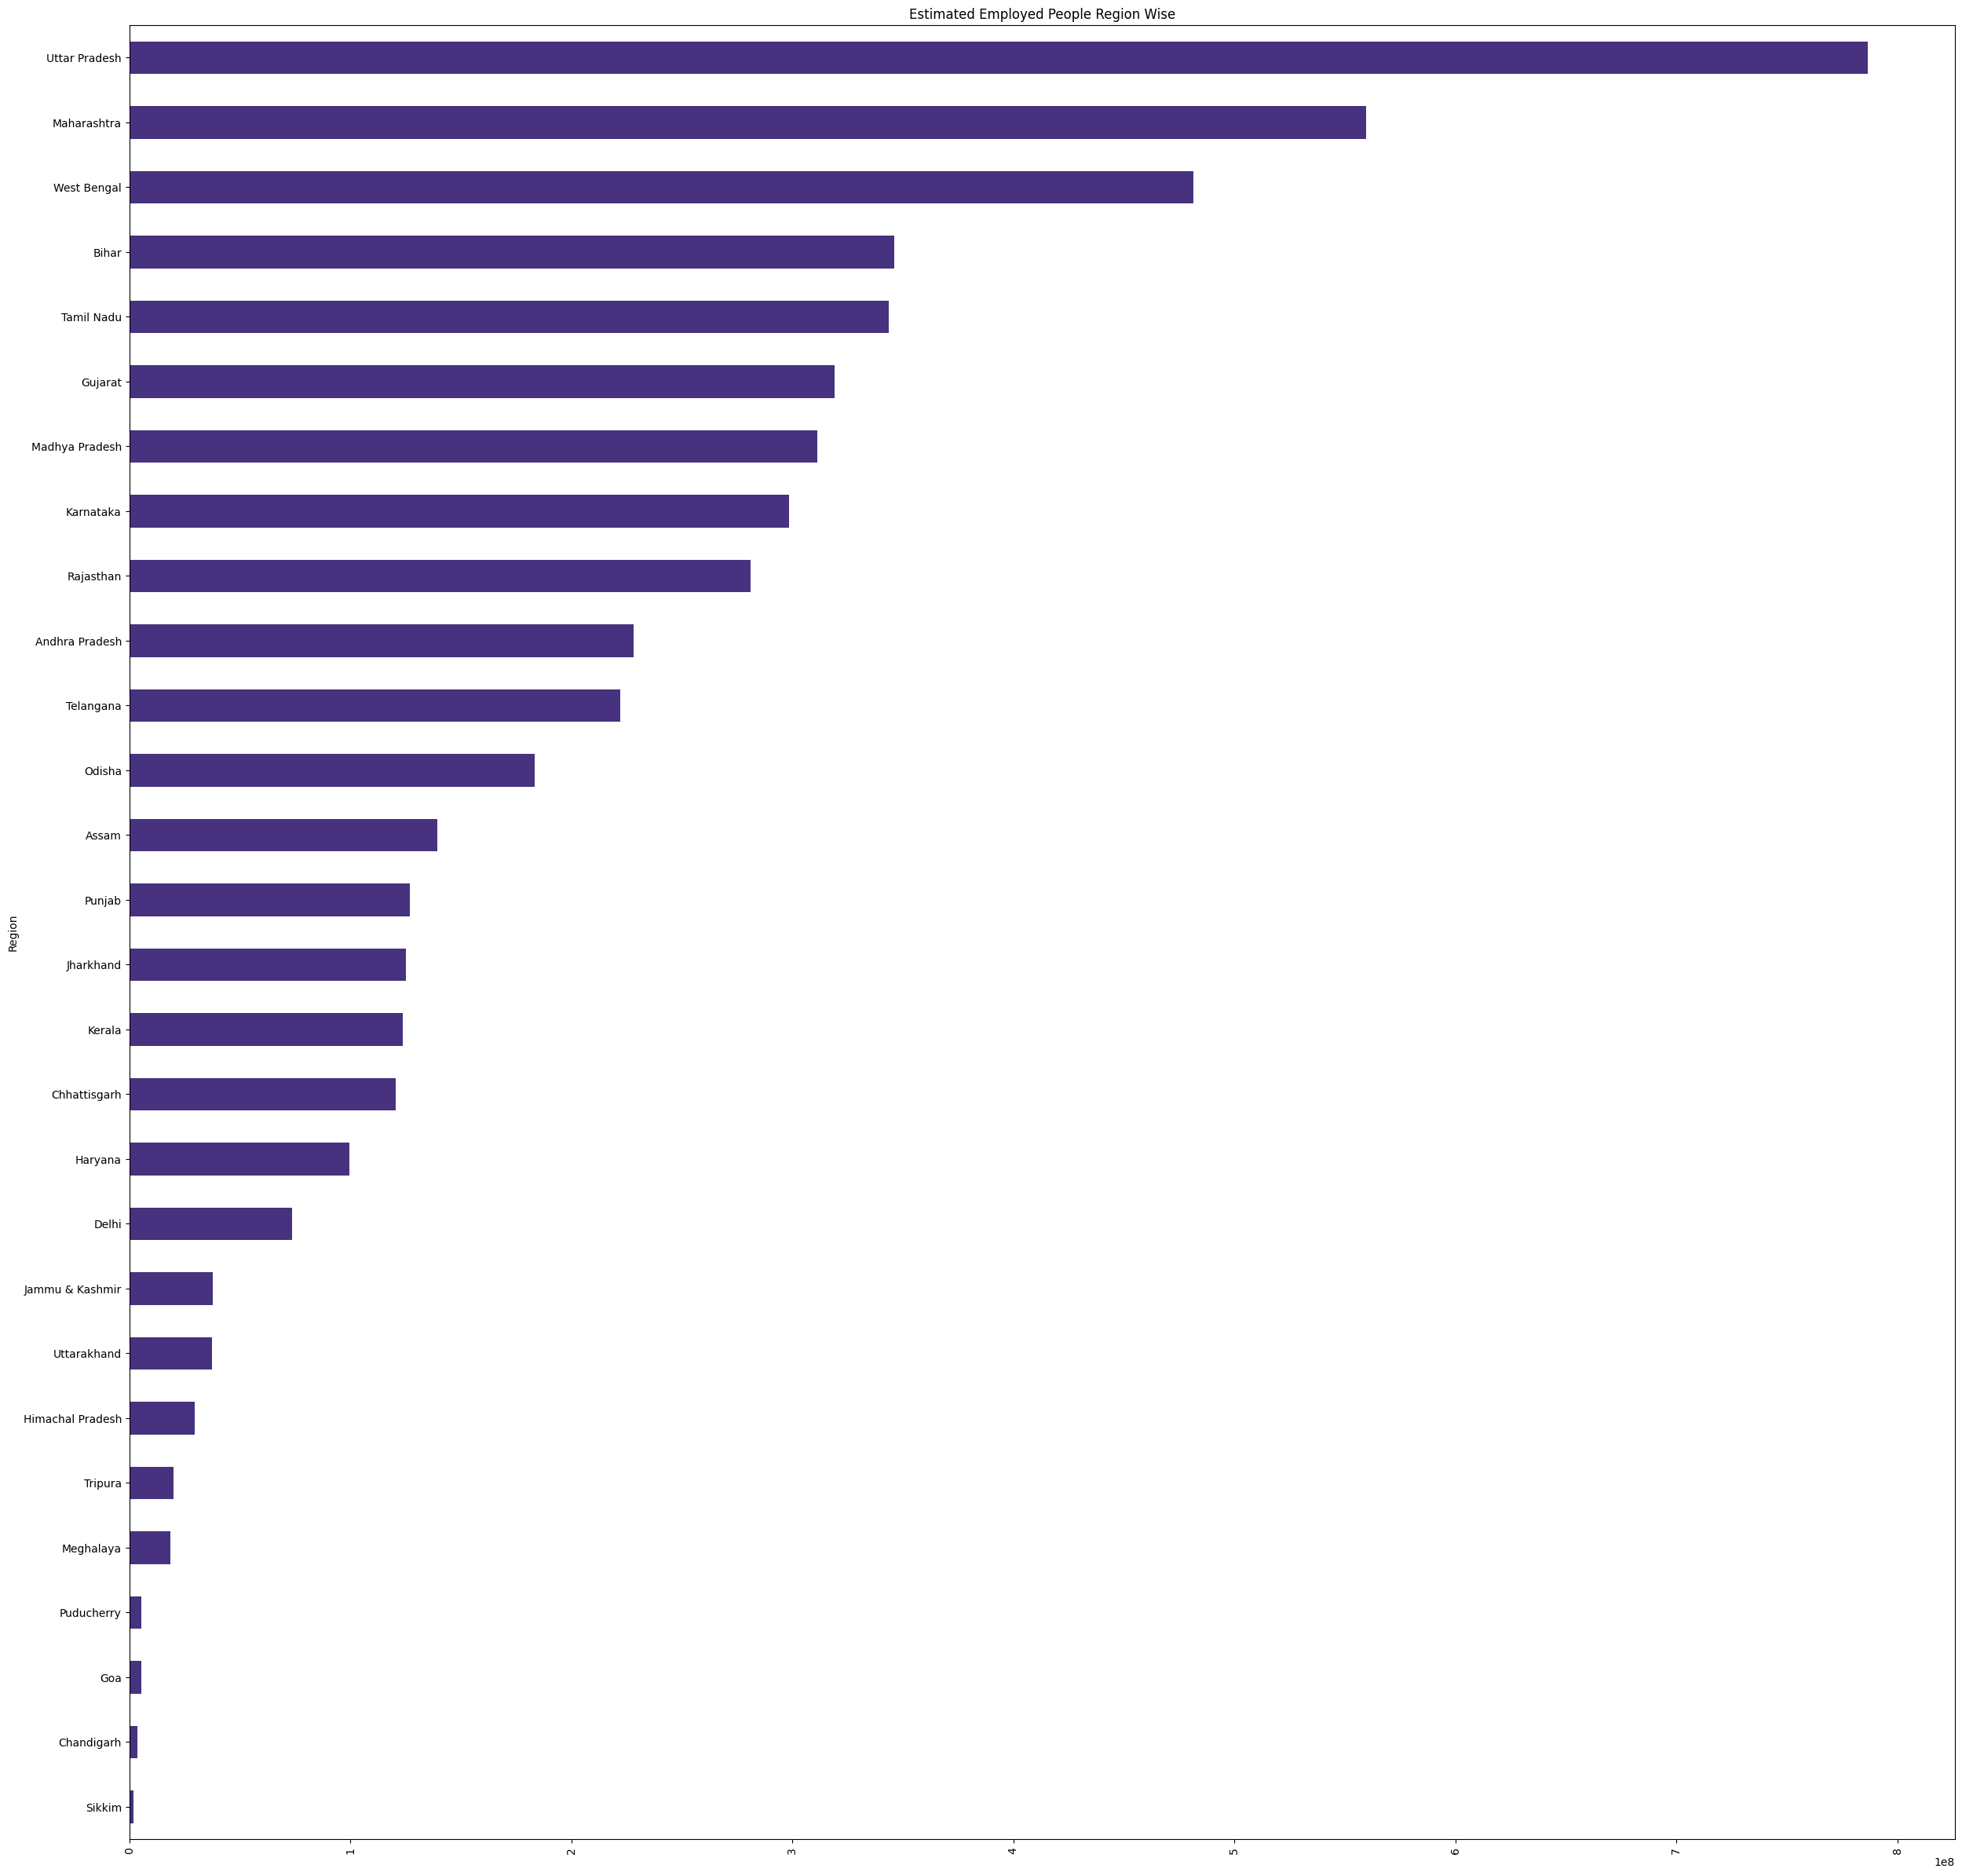

In [113]:
#  Getting the Highest Estimated Employed People Region Wise
a2=df.groupby(['Region'])['Estimated Employed'].sum().sort_values(ascending=True)
plt.figure(figsize=(30,30))
a2.plot(kind='barh')
plt.title('Estimated Employed People Region Wise')
plt.xticks(rotation=90)
plt.show()

The Top 5 Regions having Highest Estimated Employed People.

1. Uttar Pradesh
2. Maharastra
3. West Bengal
4. Bihar
5. Tamil Nadu

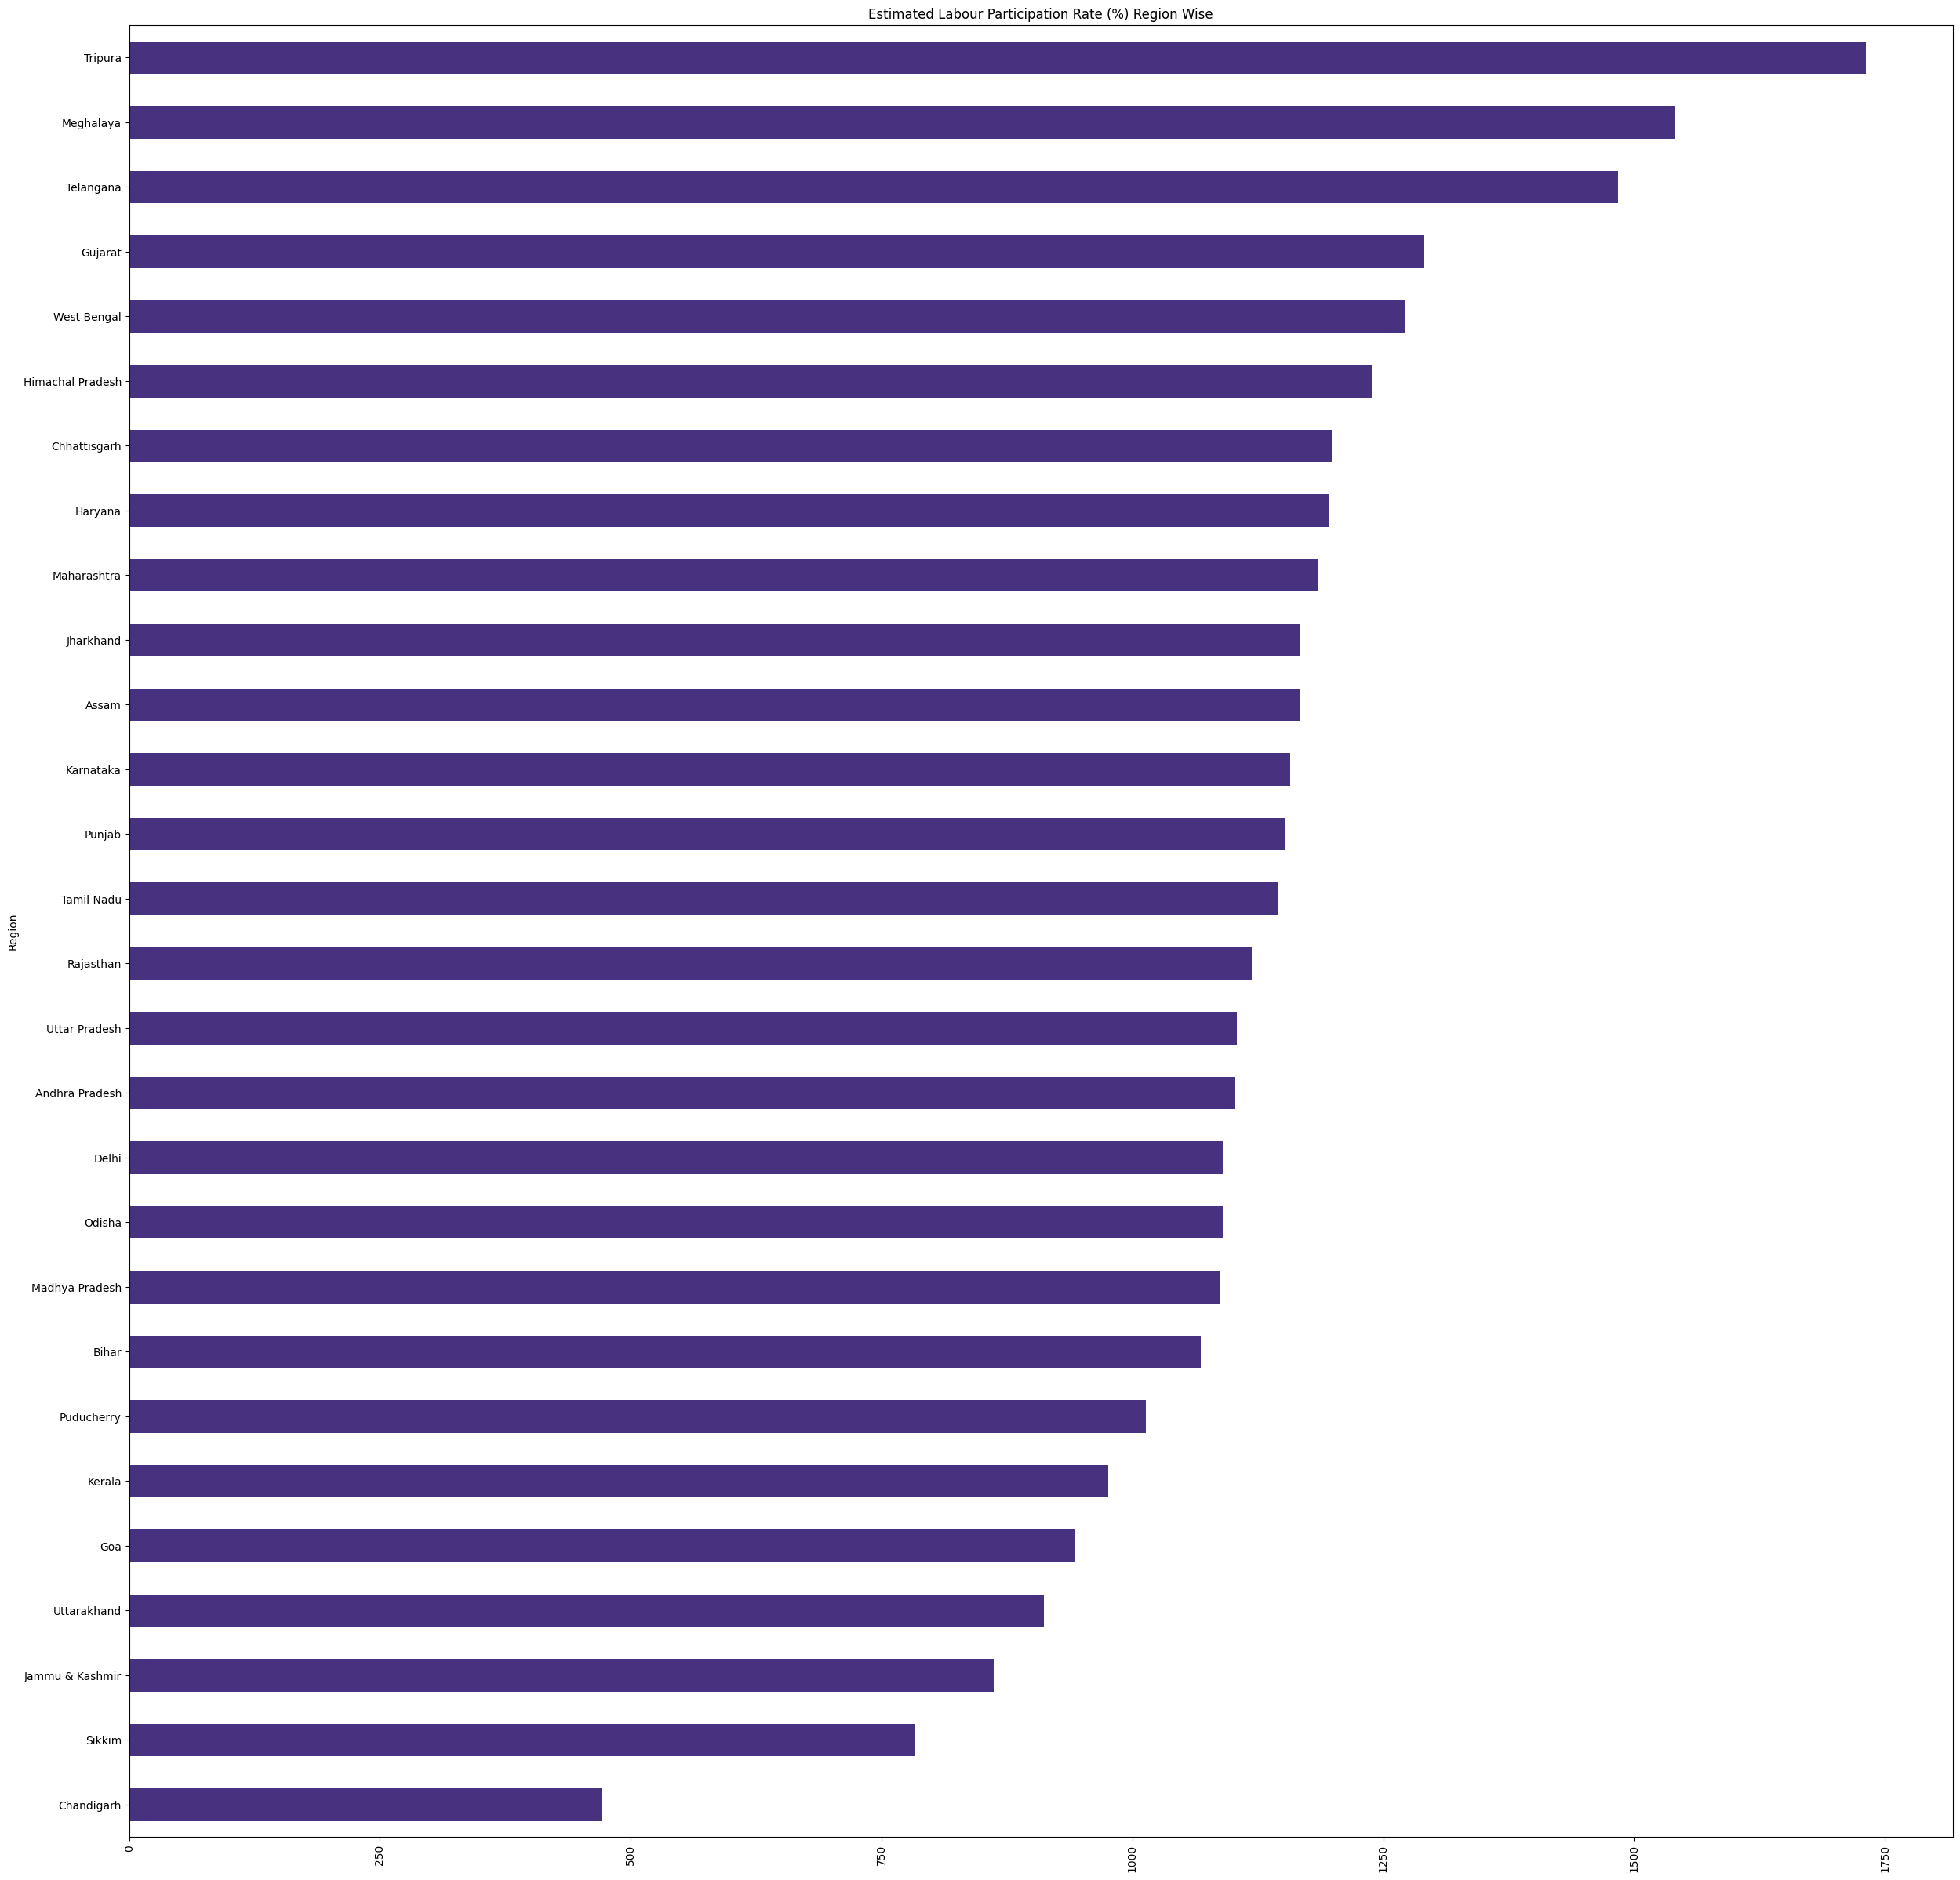

In [114]:
 #  Getting the Highest Estimated Labour Participation Rate (%) Region Wise
a3=df.groupby(['Region'])['Estimated Labour Participation Rate (%)'].sum().sort_values(ascending=True)
plt.figure(figsize=(30,30))
a3.plot(kind='barh')
plt.title('Estimated Labour Participation Rate (%) Region Wise')
plt.xticks(rotation=90)
plt.show()

The Top 5 Regions having Highest Estimated Labour Participation Rate.

1. Tripura
2. Meghalaya
3. Telangana
4. Gujarat
5. West Bengal

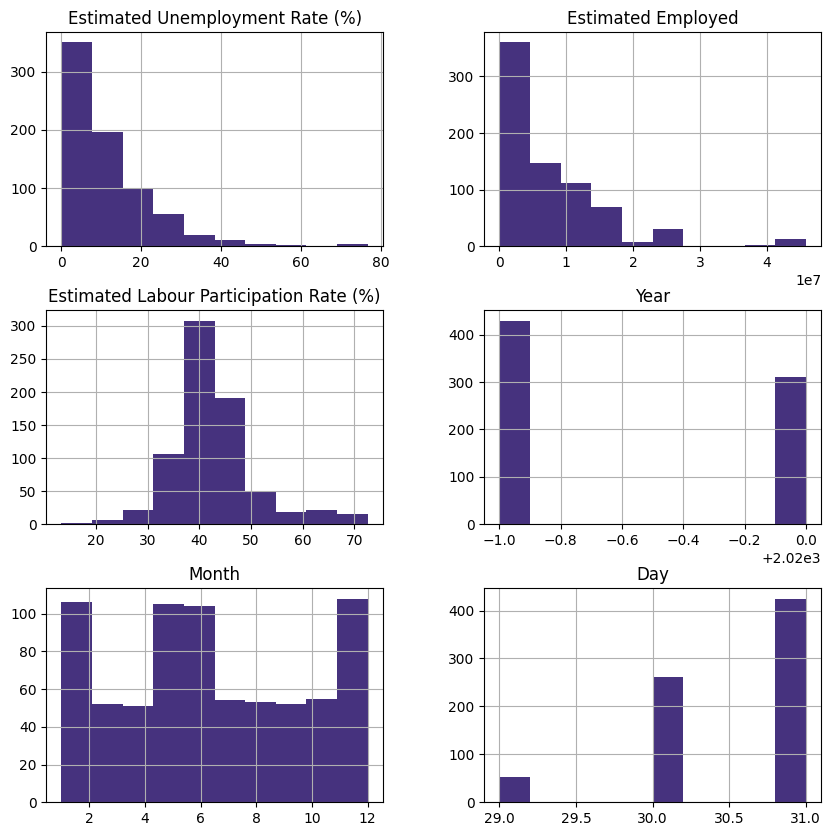

In [115]:
# plot a histogram for data
df.hist(figsize=(10,10))
plt.show()

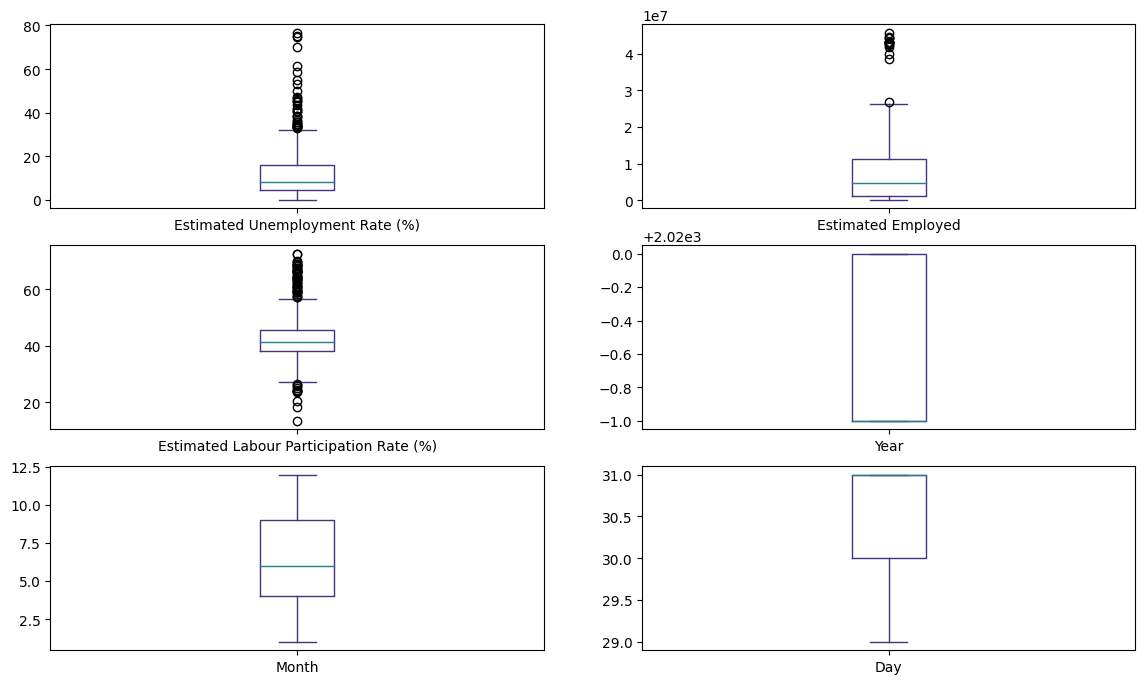

In [116]:
# plot a boxplot to check outliers
df.plot(kind="box", subplots=True, layout=(4,2), figsize=(14,11))
plt.show()

In [117]:
# showing correlation
df.corr()

Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Employed                                             -0.222876   
Estimated Labour Participation Rate (%)                         0.002558   
Year                                                            0.262602   
Month                                                          -0.122938   
Day                                                            -0.007045   

                                         Estimated Employed  \
Estimated Unemployment Rate (%)                   -0.222876   
Estimated Employed                                 1.000000   
Estimated Labour Participation Rate (%)            0.011300   
Year                                              -0.031841   
Month                                              0.011285   
Day                                                0.001746   

                                         Estimated Labour Participation Rate (%)  \
Estimated Unemployment Rate (%)                                         0.002558   
Estimated Employed                                                      0.011300   
Estimated Labour Participation Rate (%)                                 1.000000   
Year                                                                   -0.182460   
Month                                                                   0.087257   
Day                                                                     0.037578   

                                             Year     Month       Day  
Estimated Unemployment Rate (%)          0.262602 -0.122938 -0.007045  
Estimated Employed                      -0.031841  0.011285  0.001746  
Estimated Labour Participation Rate (%) -0.182460  0.087257  0.037578  
Year                                     1.000000 -0.768484 -0.230783  
Month                                   -0.768484  1.000000  0.159125  
Day                                     -0.230783  0.159125  1.000000

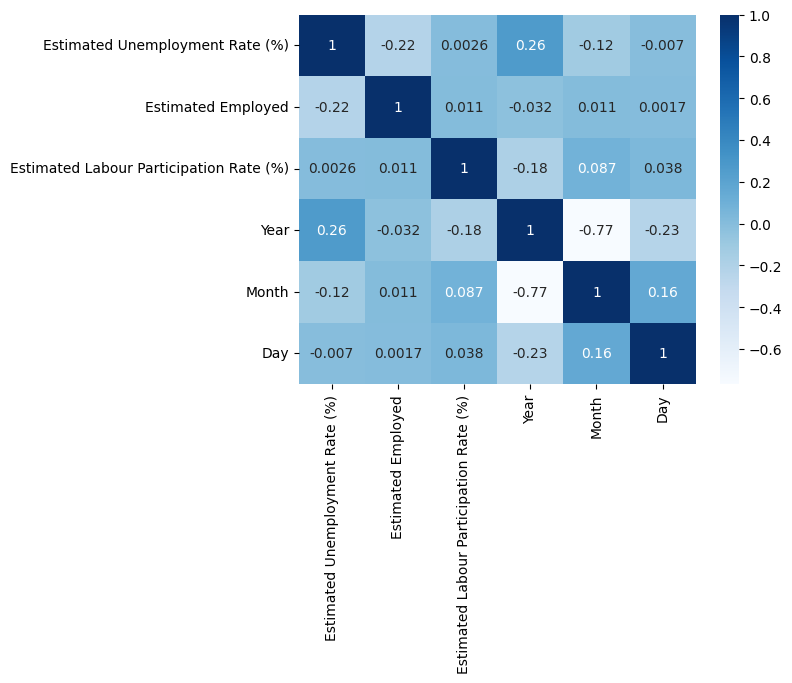

In [118]:
# showing correlation plot
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

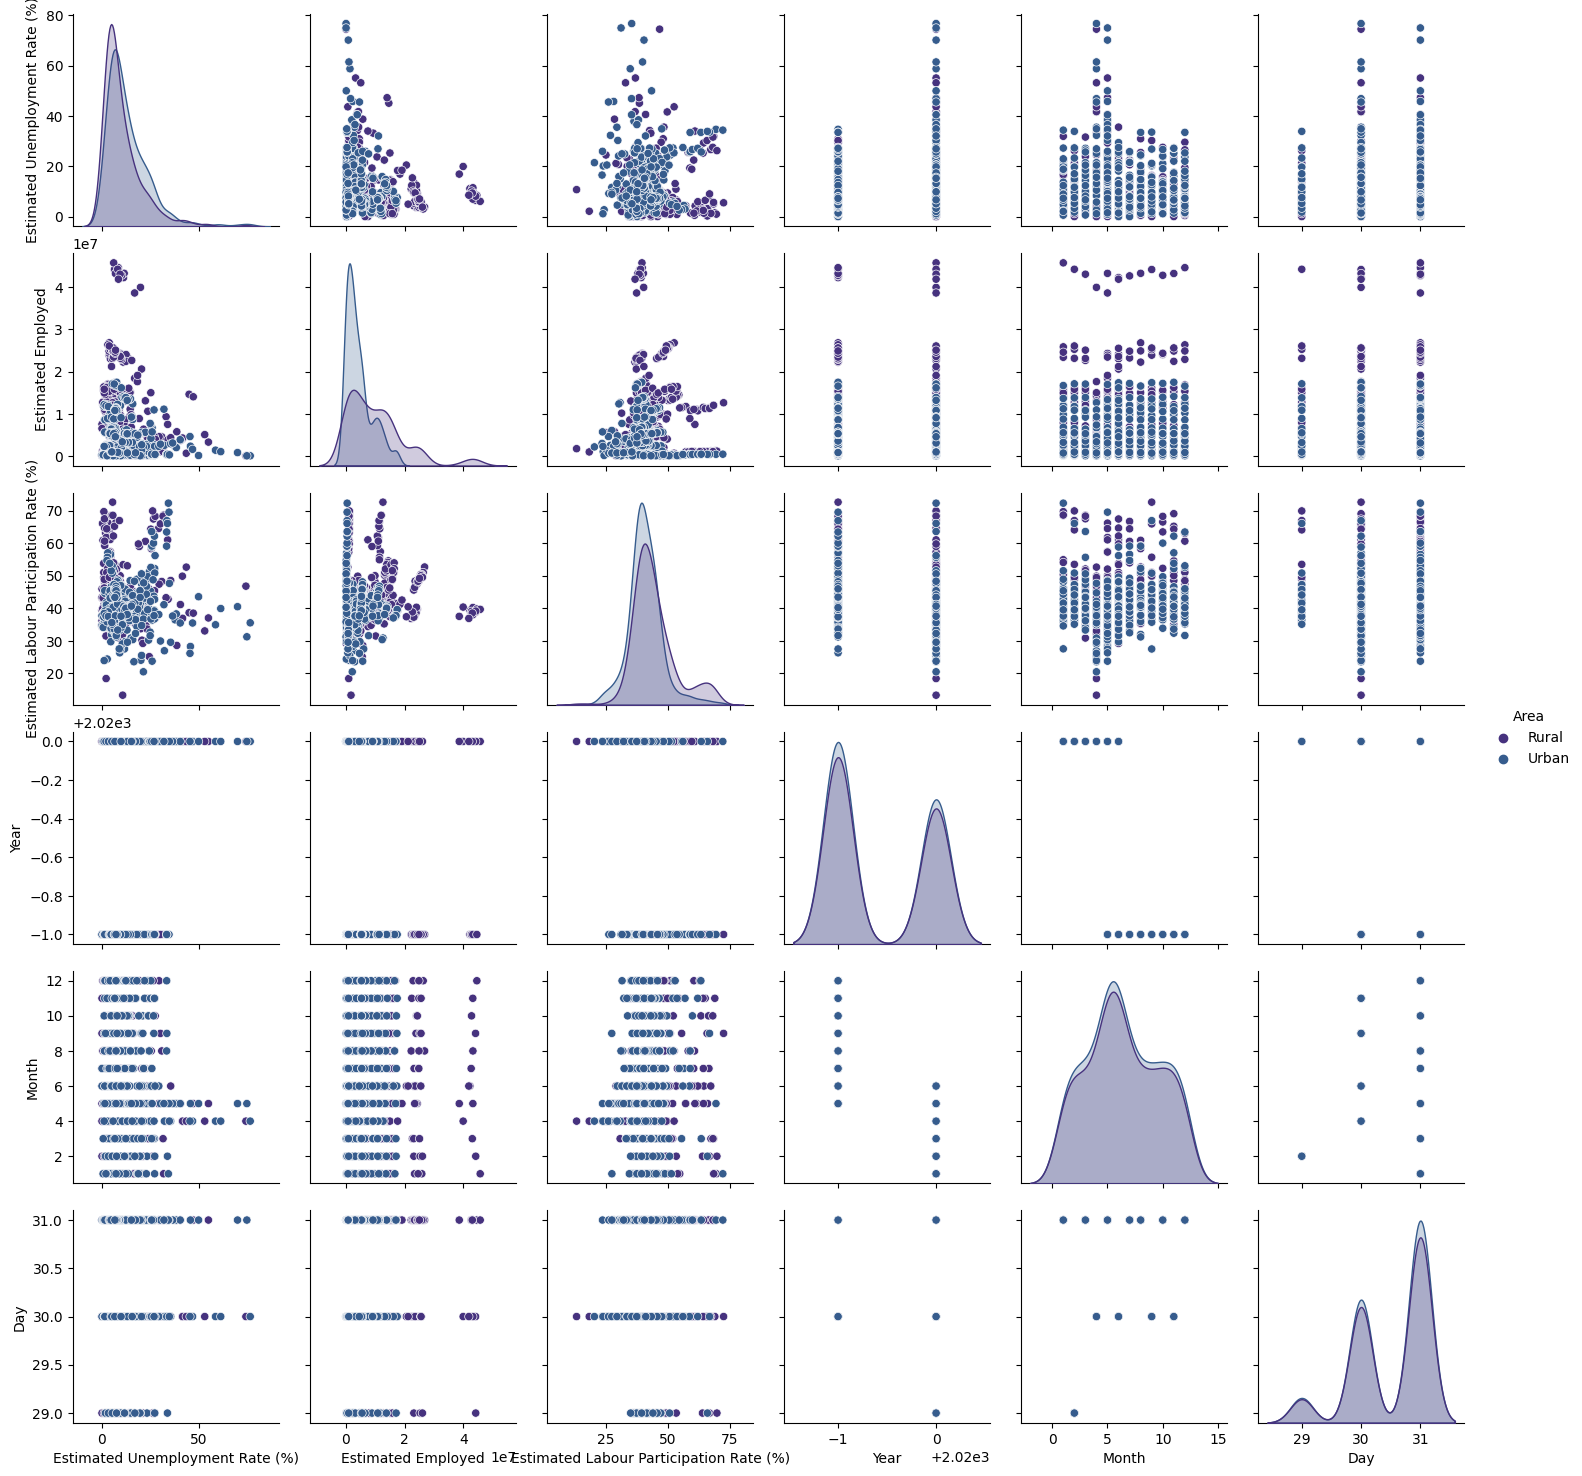

In [119]:
  # showing pairplot for data area wise
sns.pairplot(df,hue='Area')
plt.show()

# Gathering Information
The largest rate of unemployment is in urban areas.
2. The rate of labour force participation is highest in rural areas.
3. The most estimated employed people are located in rural areas.
4. The highest unemployment rate was in 2019.
5. The highest unemployment rate was on December 31.
6. The highest rate of unemployment is in the month of May.
7. Chandigarh has the lowest unemployment rate in the country.
8. Tripura has the highest estimated unemployment rate in terms of percentage.
9. The highest estimated number of people in employment is in Uttar Pradesh.
10. The state with the highest estimated labour participation rate is Tripura.



# Unemployment Rate upto 11_2020 Dataset

# Data Preparation

In [120]:
# loading the dataset
df1 = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')
df1

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98   

      Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0               16635535                                     41.02    South   
1               16545652                                     40.90    South   
2               15881197                                     39.18    South   
3               11336911                                     33.10    South   
4               12988845                                     36.46    South   
..                   ...                                       ...      ...   
262             30726310                                     40.39     East   
263             35372506                                     46.17     East   
264             33298644                                     47.48     East   
265             35707239                                     47.73     East   
266             33962549                                     45.63     East   

     longitude  latitude  
0      15.9129    79.740  
1      15.9129    79.740  
2      15.9129    79.740  
3      15.9129    79.740  
4      15.9129    79.740  
..         ...       ...  
262    22.9868    87.855  
263    22.9868    87.855  
264    22.9868    87.855  
265    22.9868    87.855  
266    22.9868    87.855  

[267 rows x 9 columns]

In [121]:
# showing the first 5 rows
df1.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [122]:
# showing the last 5 rows
df1.tail()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
262  West Bengal   30-06-2020          M                              7.29   
263  West Bengal   31-07-2020          M                              6.83   
264  West Bengal   31-08-2020          M                             14.87   
265  West Bengal   30-09-2020          M                              9.35   
266  West Bengal   31-10-2020          M                              9.98   

      Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
262             30726310                                     40.39     East   
263             35372506                                     46.17     East   
264             33298644                                     47.48     East   
265             35707239                                     47.73     East   
266             33962549                                     45.63     East   

     longitude  latitude  
262    22.9868    87.855  
263    22.9868    87.855  
264    22.9868    87.855  
265    22.9868    87.855  
266    22.9868    87.855

# Basic Understanding of Dataset

In [123]:
# showing the dimension of data
df1.shape
# number of rows and columns are 267 and 9

(267, 9)

In [124]:
# showing the column names
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [125]:
# Removing starting and ending spaces from column names
df1.columns = df1.columns.str.strip()
df1.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [126]:
# checking for data types
df1.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                           int64
Estimated Labour Participation Rate (%)    float64
Region.1                                    object
longitude                                  float64
latitude                                   float64
dtype: object

In [127]:
# Checking for duplicates
df1.duplicated().sum()

0

In [128]:
# checking for null values
df1.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

In [129]:
# checking for no. of unique values
df1.nunique().sort_values()

Frequency                                    1
Region.1                                     5
Date                                        10
latitude                                    24
Region                                      27
longitude                                   27
Estimated Labour Participation Rate (%)    248
Estimated Unemployment Rate (%)            252
Estimated Employed                         267
dtype: int64

In [130]:
# checking for unique values of Frequency Column
df1['Frequency'].unique()

array([' M'], dtype=object)

In [131]:
# checking for unique values of Region.1 Column
df1['Region.1'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [132]:
# checking for unique values of Region Column
df1['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [133]:
# checking for unique values of Date Column
df1['Date'].unique()

array([' 31-01-2020', ' 29-02-2020', ' 31-03-2020', ' 30-04-2020',
       ' 31-05-2020', ' 30-06-2020', ' 31-07-2020', ' 31-08-2020',
       ' 30-09-2020', ' 31-10-2020'], dtype=object)

In [134]:
# checking for unique values of latitude Column
df1['latitude'].unique()

array([79.74  , 92.9376, 85.3131, 81.8661, 77.1025, 74.124 , 71.1924,
       76.0856, 77.1734, 76.5762, 85.2799, 75.7139, 76.2711, 78.6569,
       91.3662, 85.0985, 79.8083, 75.3412, 74.2179, 88.5122, 79.0193,
       91.9882, 80.9462, 87.855 ])

In [135]:
# checking for unique values of longitude Column
df1['longitude'].unique()

array([15.9129, 26.2006, 25.0961, 21.2787, 28.7041, 15.2993, 22.2587,
       29.0588, 31.1048, 33.7782, 23.6102, 15.3173, 10.8505, 22.9734,
       19.7515, 25.467 , 20.9517, 11.9416, 31.1471, 27.0238, 27.533 ,
       11.1271, 18.1124, 23.9408, 26.8467, 30.0668, 22.9868])

In [136]:
# showing information of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [137]:
# Descriptive Statistical Analysis of Data
df1.describe(include='all')

Region         Date Frequency  \
count              267          267       267   
unique              27           10         1   
top     Andhra Pradesh   31-03-2020         M   
freq                10           27       267   
mean               NaN          NaN       NaN   
std                NaN          NaN       NaN   
min                NaN          NaN       NaN   
25%                NaN          NaN       NaN   
50%                NaN          NaN       NaN   
75%                NaN          NaN       NaN   
max                NaN          NaN       NaN   

        Estimated Unemployment Rate (%)  Estimated Employed  \
count                        267.000000        2.670000e+02   
unique                              NaN                 NaN   
top                                 NaN                 NaN   
freq                                NaN                 NaN   
mean                          12.236929        1.396211e+07   
std                           10.803283        1.336632e+07   
min                            0.500000        1.175420e+05   
25%                            4.845000        2.838930e+06   
50%                            9.650000        9.732417e+06   
75%                           16.755000        2.187869e+07   
max                           75.850000        5.943376e+07   

        Estimated Labour Participation Rate (%) Region.1   longitude  \
count                                267.000000      267  267.000000   
unique                                      NaN        5         NaN   
top                                         NaN    North         NaN   
freq                                        NaN       79         NaN   
mean                                  41.681573      NaN   22.826048   
std                                    7.845419      NaN    6.270731   
min                                   16.770000      NaN   10.850500   
25%                                   37.265000      NaN   18.112400   
50%                                   40.390000      NaN   23.610200   
75%                                   44.055000      NaN   27.278400   
max                                   69.690000      NaN   33.778200   

          latitude  
count   267.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean     80.532425  
std       5.831738  
min      71.192400  
25%      76.085600  
50%      79.019300  
75%      85.279900  
max      92.937600

# Data Cleaning

Data Cleaning In Frequency Column

In [138]:
df['Frequency'].replace(' M','M',inplace=True)
df['Frequency'].unique()

array(['Monthly'], dtype=object)

Data Cleaning In Date Column

In [139]:
# Changing Data Type of Date Column
df1['Date']=pd.to_datetime(df1['Date'])
df1.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Region.1                                           object
longitude                                         float64
latitude                                          float64
dtype: object

In [140]:
# Extracting Year , Month, and Day from Date Column
df1['Year']=df1['Date'].dt.year
df1['Month']=df1['Date'].dt.month
df1['Day']=df1['Date'].dt.day
df1.head()

Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2020-01-31         M                             5.48   
1  Andhra Pradesh 2020-02-29         M                             5.83   
2  Andhra Pradesh 2020-03-31         M                             5.79   
3  Andhra Pradesh 2020-04-30         M                            20.51   
4  Andhra Pradesh 2020-05-31         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   longitude  latitude  Year  Month  Day  
0    15.9129     79.74  2020      1   31  
1    15.9129     79.74  2020      2   29  
2    15.9129     79.74  2020      3   31  
3    15.9129     79.74  2020      4   30  
4    15.9129     79.74  2020      5   31

In [141]:
# Dropping Date Column
df1.drop(['Date'],axis = 1, inplace=True)
df1.columns

Index(['Region', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'Year', 'Month', 'Day'],
      dtype='object')

# Feature Engineering

In [142]:
# Checking for unique values
df1.nunique().sort_values()

Frequency                                    1
Year                                         1
Day                                          3
Region.1                                     5
Month                                       10
latitude                                    24
Region                                      27
longitude                                   27
Estimated Labour Participation Rate (%)    248
Estimated Unemployment Rate (%)            252
Estimated Employed                         267
dtype: int64

As we can see Frequency and Year Column has only single values So we will drop these columns.

In [143]:
# Dropping Unnecessary Columns
df1.drop(['Frequency','Year'],axis = 1, inplace=True)
df1.columns

Index(['Region', 'Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude',
       'latitude', 'Month', 'Day'],
      dtype='object')

# Extracting all Categorical and Numerical Columns

In [144]:
cat_cols = df1.select_dtypes(include='object').columns
print(cat_cols)
num_cols = df1.select_dtypes(exclude='object').columns
print(num_cols)

Index(['Region', 'Region.1'], dtype='object')
Index(['Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'longitude', 'latitude',
       'Month', 'Day'],
      dtype='object')


# Data Visualization

1. Day Column

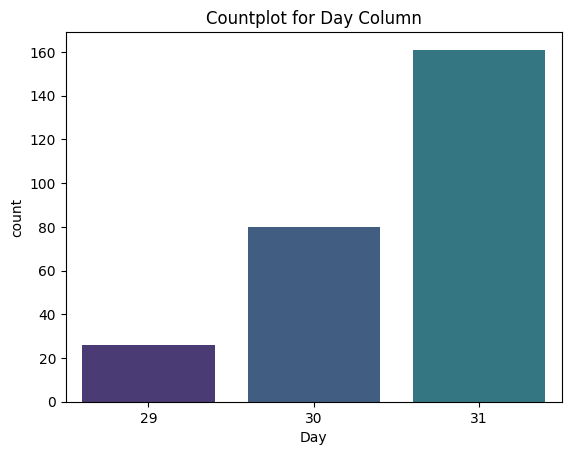

In [145]:
# CountPlot for Day Column
sns.countplot(data=df1,x='Day')
plt.title('Countplot for Day Column')
plt.show()

Relationship between Unemployment Rate and Day.

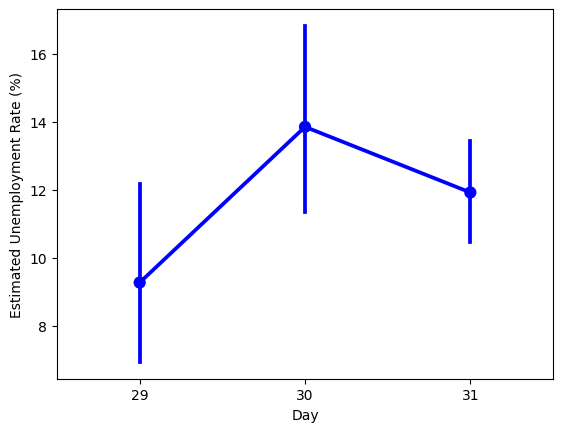

In [146]:
sns.pointplot(data=df1,x='Day',y='Estimated Unemployment Rate (%)',color='blue')
plt.show()

Relationship Between Day and Estimated Employed People.

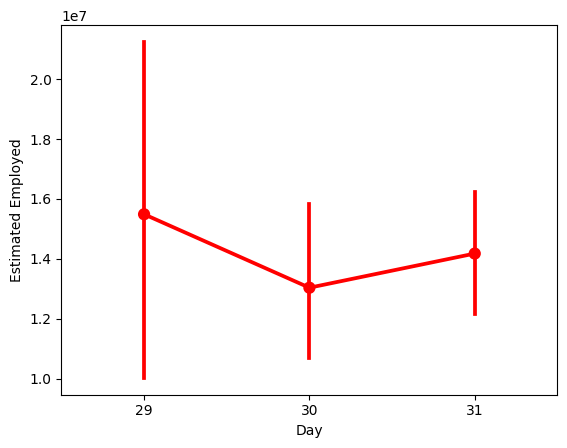

In [147]:
sns.pointplot(data=df1,x='Day',y='Estimated Employed',color='red')
plt.show()

Relationship Between Day and Estimated Labour Participation Rate.

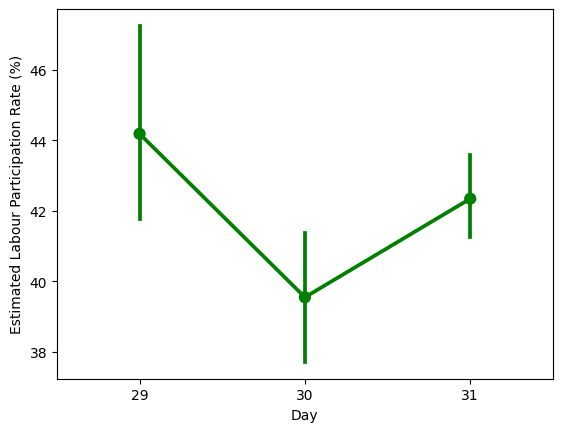

In [148]:
sns.pointplot(data=df1,x='Day',y='Estimated Labour Participation Rate (%)',color='green')
plt.show()

2. Region.1 Column

In [149]:
a1 = df1['Region.1'].value_counts()
a1

North        79
South        60
West         50
East         40
Northeast    38
Name: Region.1, dtype: int64

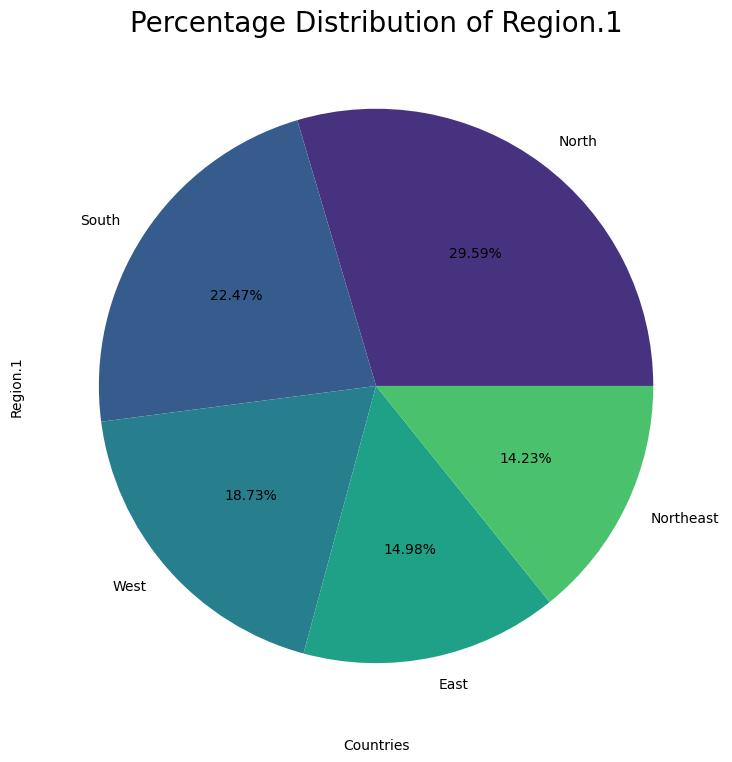

In [150]:
# Percentage Distribution of Region.1
plt.figure(figsize=(10,9))
a1.plot(kind='pie',autopct = '%.2f%%')
plt.title("Percentage Distribution of Region.1", fontsize=20)
plt.xlabel('Countries')
plt.show()

Unemployment Rate Region.1 wise.

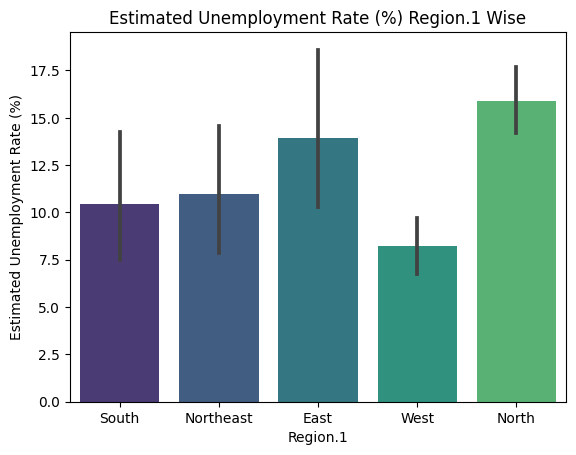

In [151]:
sns.barplot(data=df1,x='Region.1',y='Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate (%) Region.1 Wise')
plt.show()

The Highest Unemployment Rate is in North India.

Labour Participation Rate Region.1 wise.

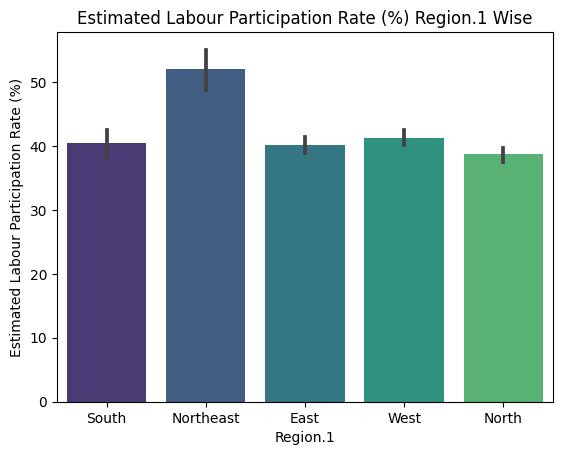

In [152]:
sns.barplot(data=df1,x='Region.1',y='Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Participation Rate (%) Region.1 Wise')
plt.show()

Labour Participation Rate is more in Norheast India.

Employed People Region.1 wise.

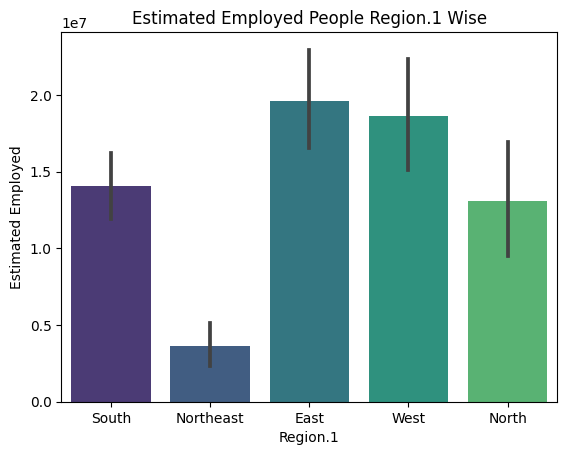

In [153]:
sns.barplot(data=df1,x='Region.1',y='Estimated Employed')
plt.title('Estimated Employed People Region.1 Wise')
plt.show()

Mostly East Indians are Employed.

3. Month Column

In [154]:
df1['Month'].value_counts()

3     27
5     27
6     27
7     27
8     27
9     27
10    27
1     26
2     26
4     26
Name: Month, dtype: int64

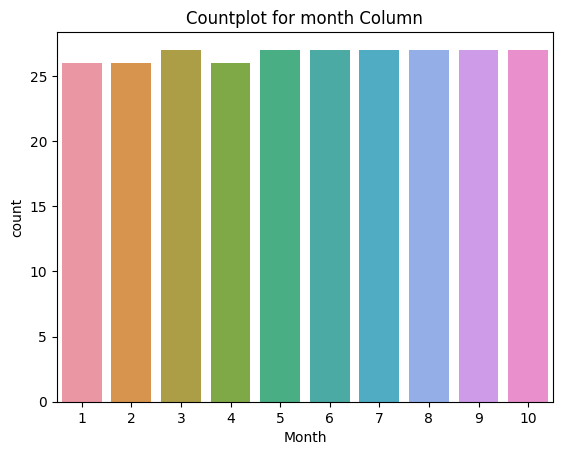

In [155]:
# Countplot for month Column
sns.countplot(data=df1,x='Month')
plt.title('Countplot for month Column')
plt.show()

Unemployment Rate Month wise.

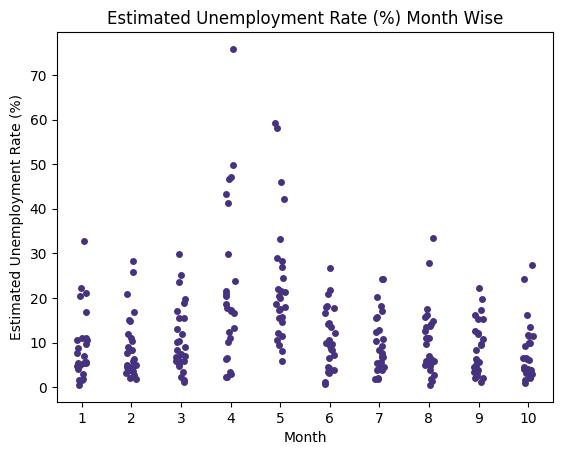

In [156]:
sns.stripplot(data=df1,x='Month',y='Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate (%) Month Wise')
plt.show()

Estimated Employed Month wise.

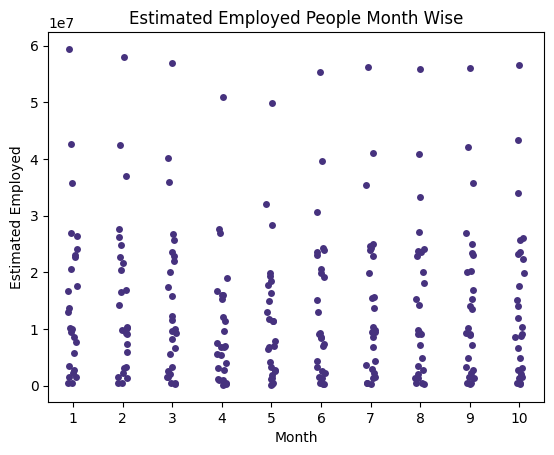

In [157]:
sns.stripplot(data=df1,x='Month',y='Estimated Employed')
plt.title('Estimated Employed People Month Wise')
plt.show()

Labour Participation Rate Month wise.

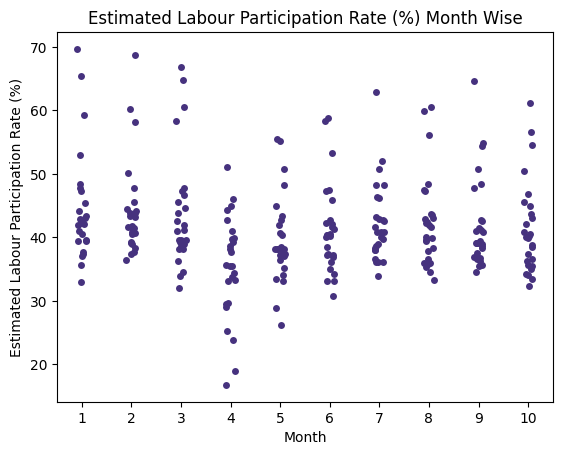

In [158]:
sns.stripplot(data=df1,x='Month',y='Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Participation Rate (%) Month Wise')
plt.show()

4. latitude Column

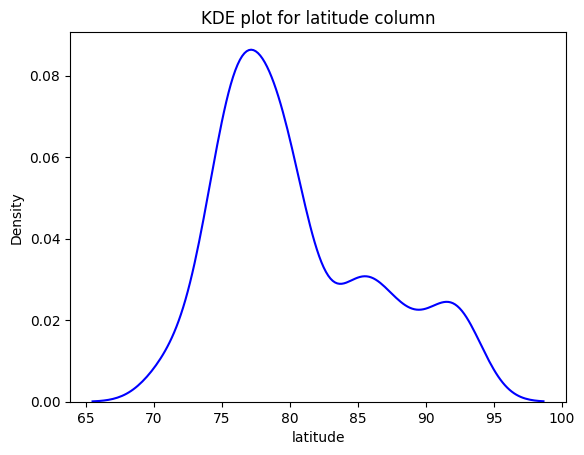

In [159]:
# kde plot for latitude column
sns.kdeplot(x=df1["latitude"],color="blue")
plt.title("KDE plot for latitude column")
plt.show()

Unemployment Rate, Labour Participation Rate, and Employed People latitude wise.

5. longitude column

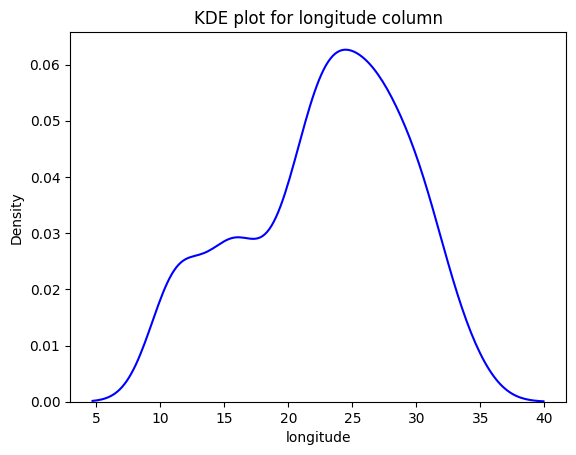

In [160]:
# kde plot for longitude column
sns.kdeplot(x=df1["longitude"],color="blue")
plt.title("KDE plot for longitude column")
plt.show()

6. Region Column

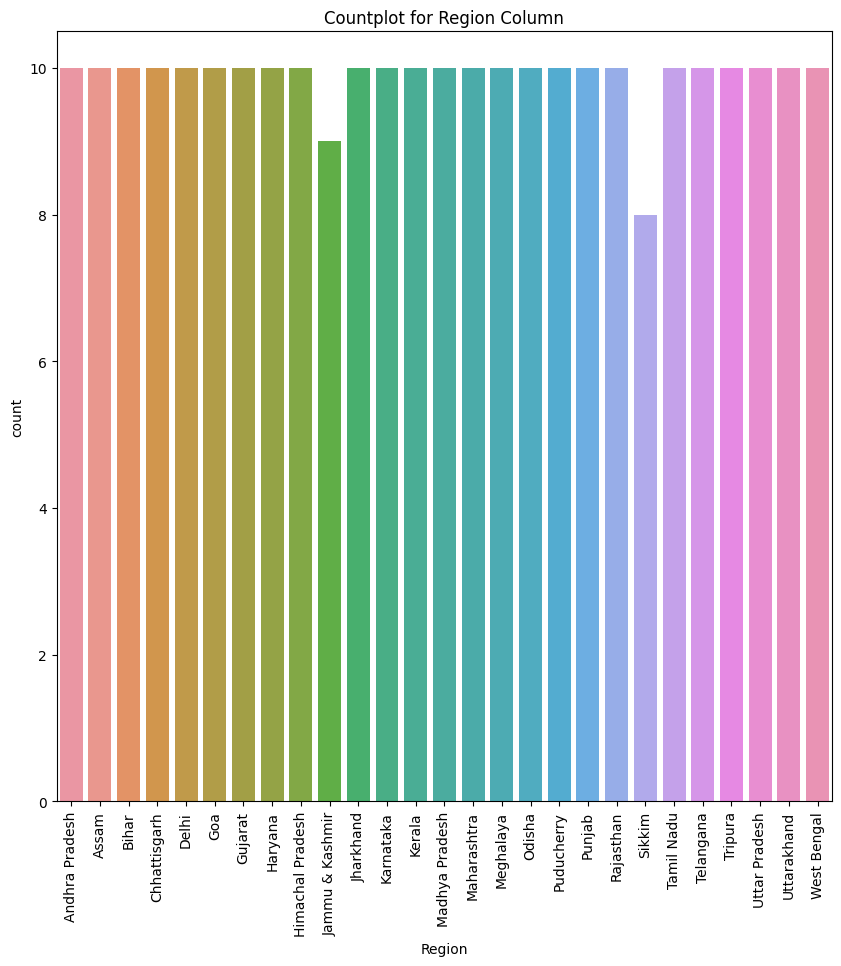

In [161]:
# CountPlot for Region Column
plt.figure(figsize=(10,10))
sns.countplot(data=df1,x='Region')
plt.title('Countplot for Region Column')
plt.xticks(rotation=90)
plt.show()

Sikkim and Jammu Kashmir have lowest Unemployment level.

Unemployment Rate Region wise.

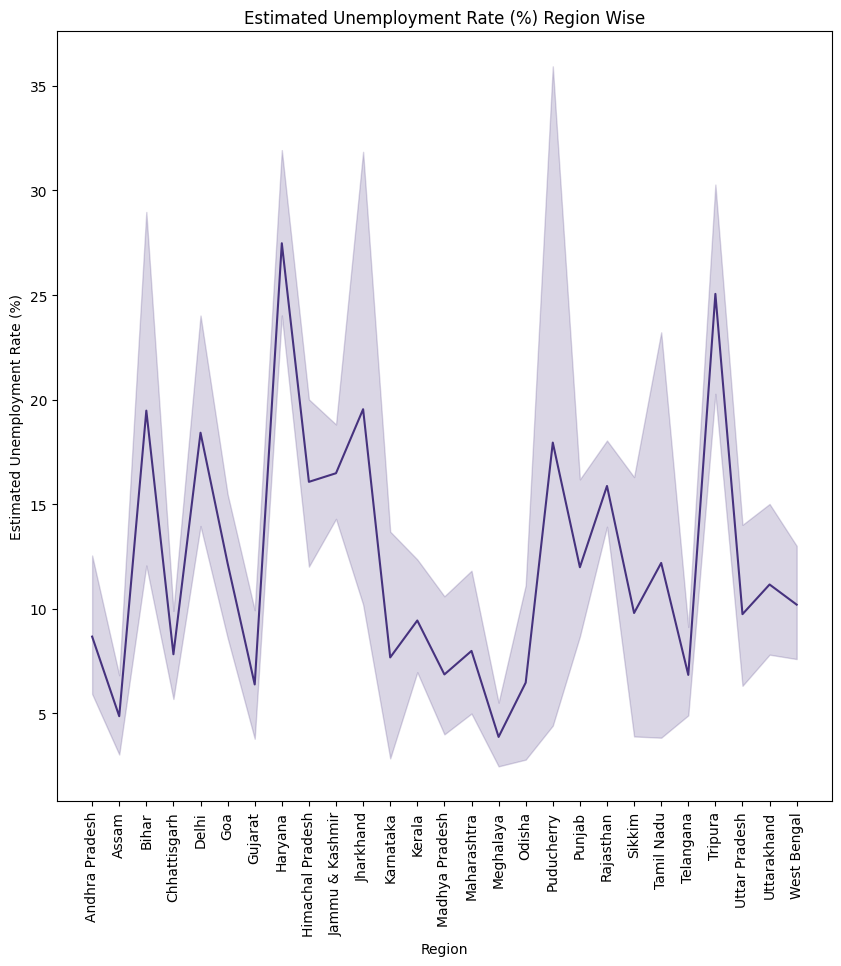

In [162]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df1,x='Region',y='Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate (%) Region Wise')
plt.xticks(rotation=90)
plt.show()

Haryana has highest Unemployment Rate.

Labour Participation Rate Region wise.

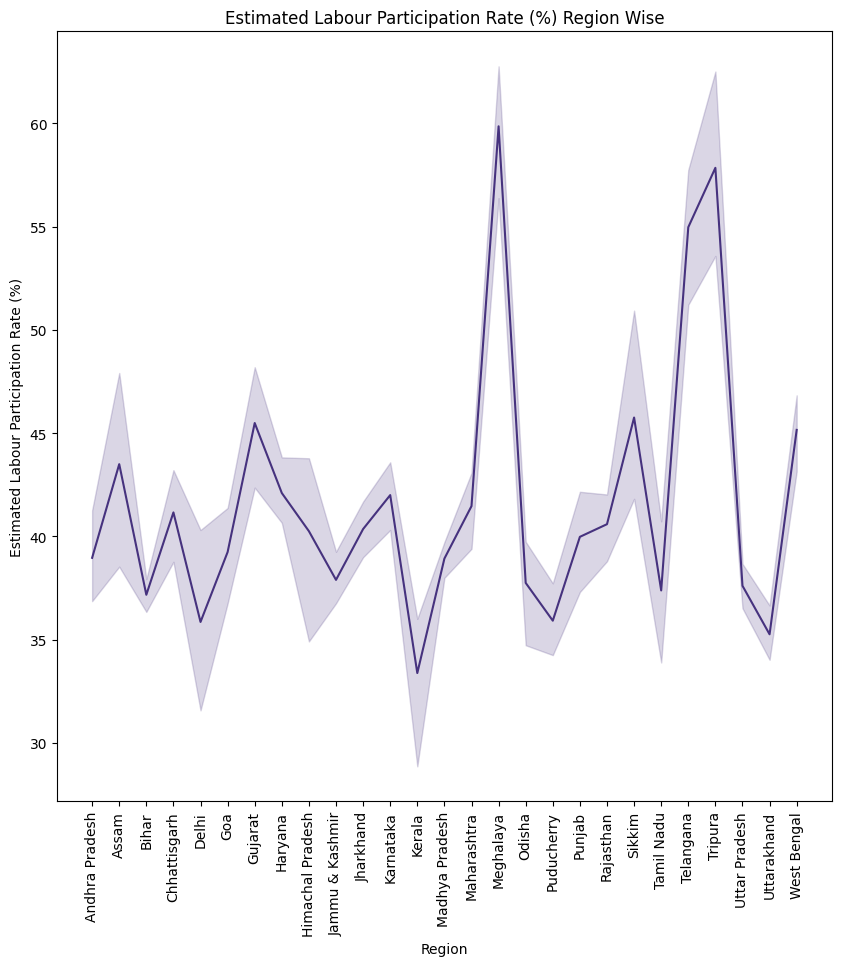

In [163]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df1,x='Region',y='Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Participation Rate (%) Region Wise')
plt.xticks(rotation=90)
plt.show()

Labour Participation Rate is more in Meghalaya.

Employed People Region wise.

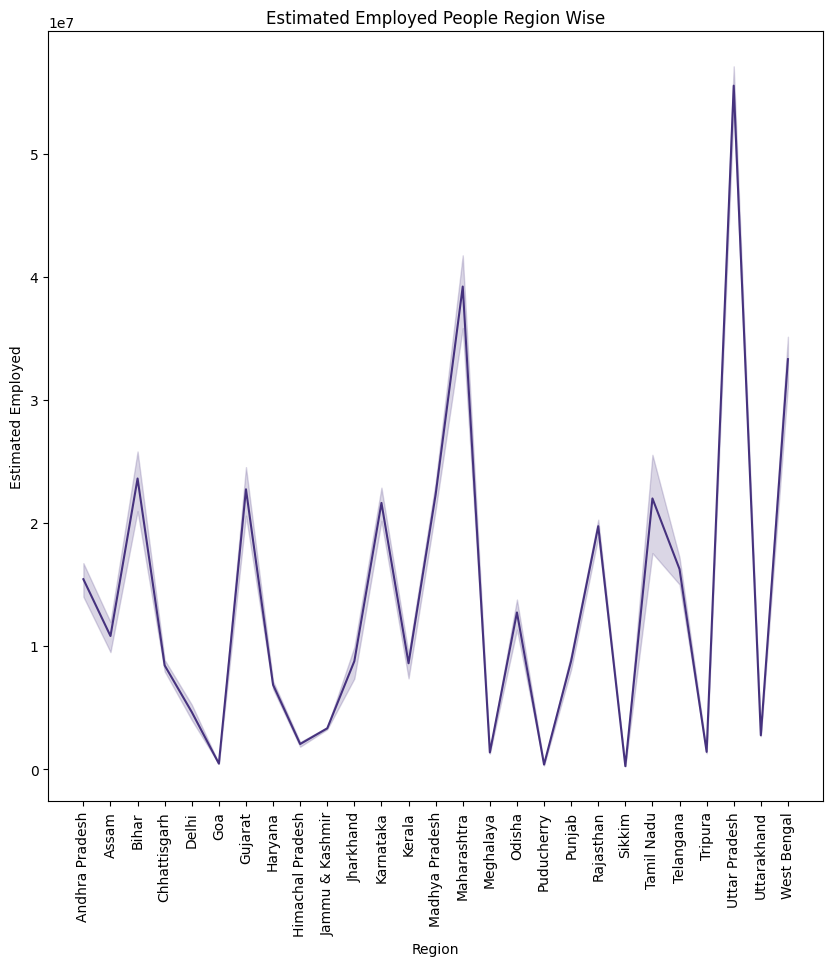

In [164]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df1,x='Region',y='Estimated Employed')
plt.title('Estimated Employed People Region Wise')
plt.xticks(rotation=90)
plt.show()

Employeed People are most in Uttar Pradesh.

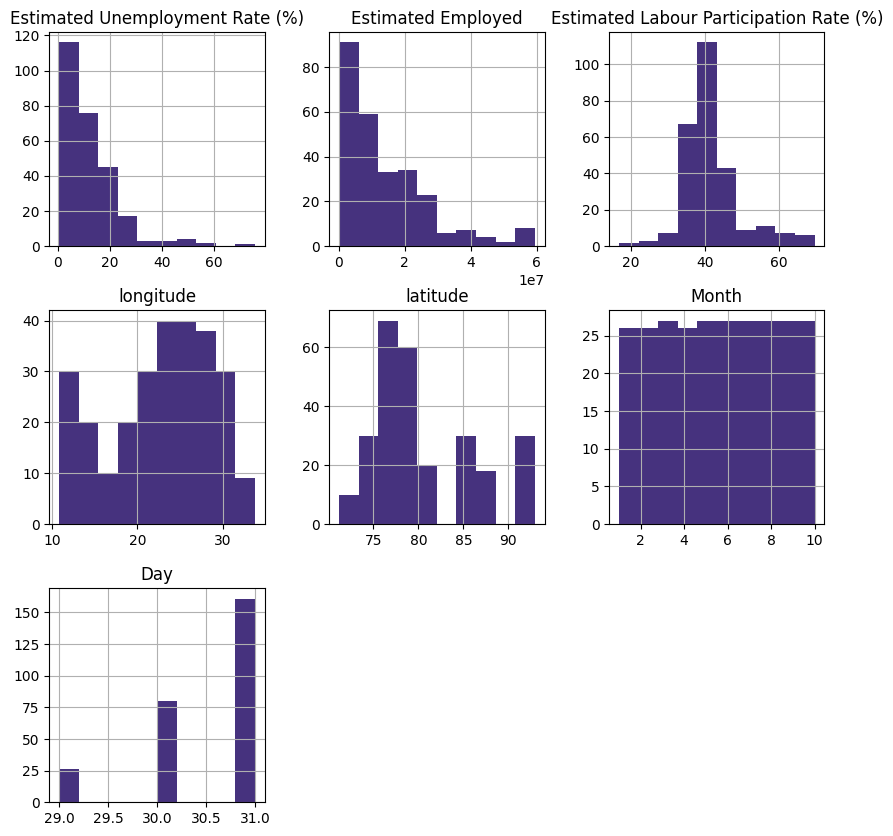

In [165]:
# Plotting Histogram for data
df1.hist(figsize=(10,10))
plt.show()

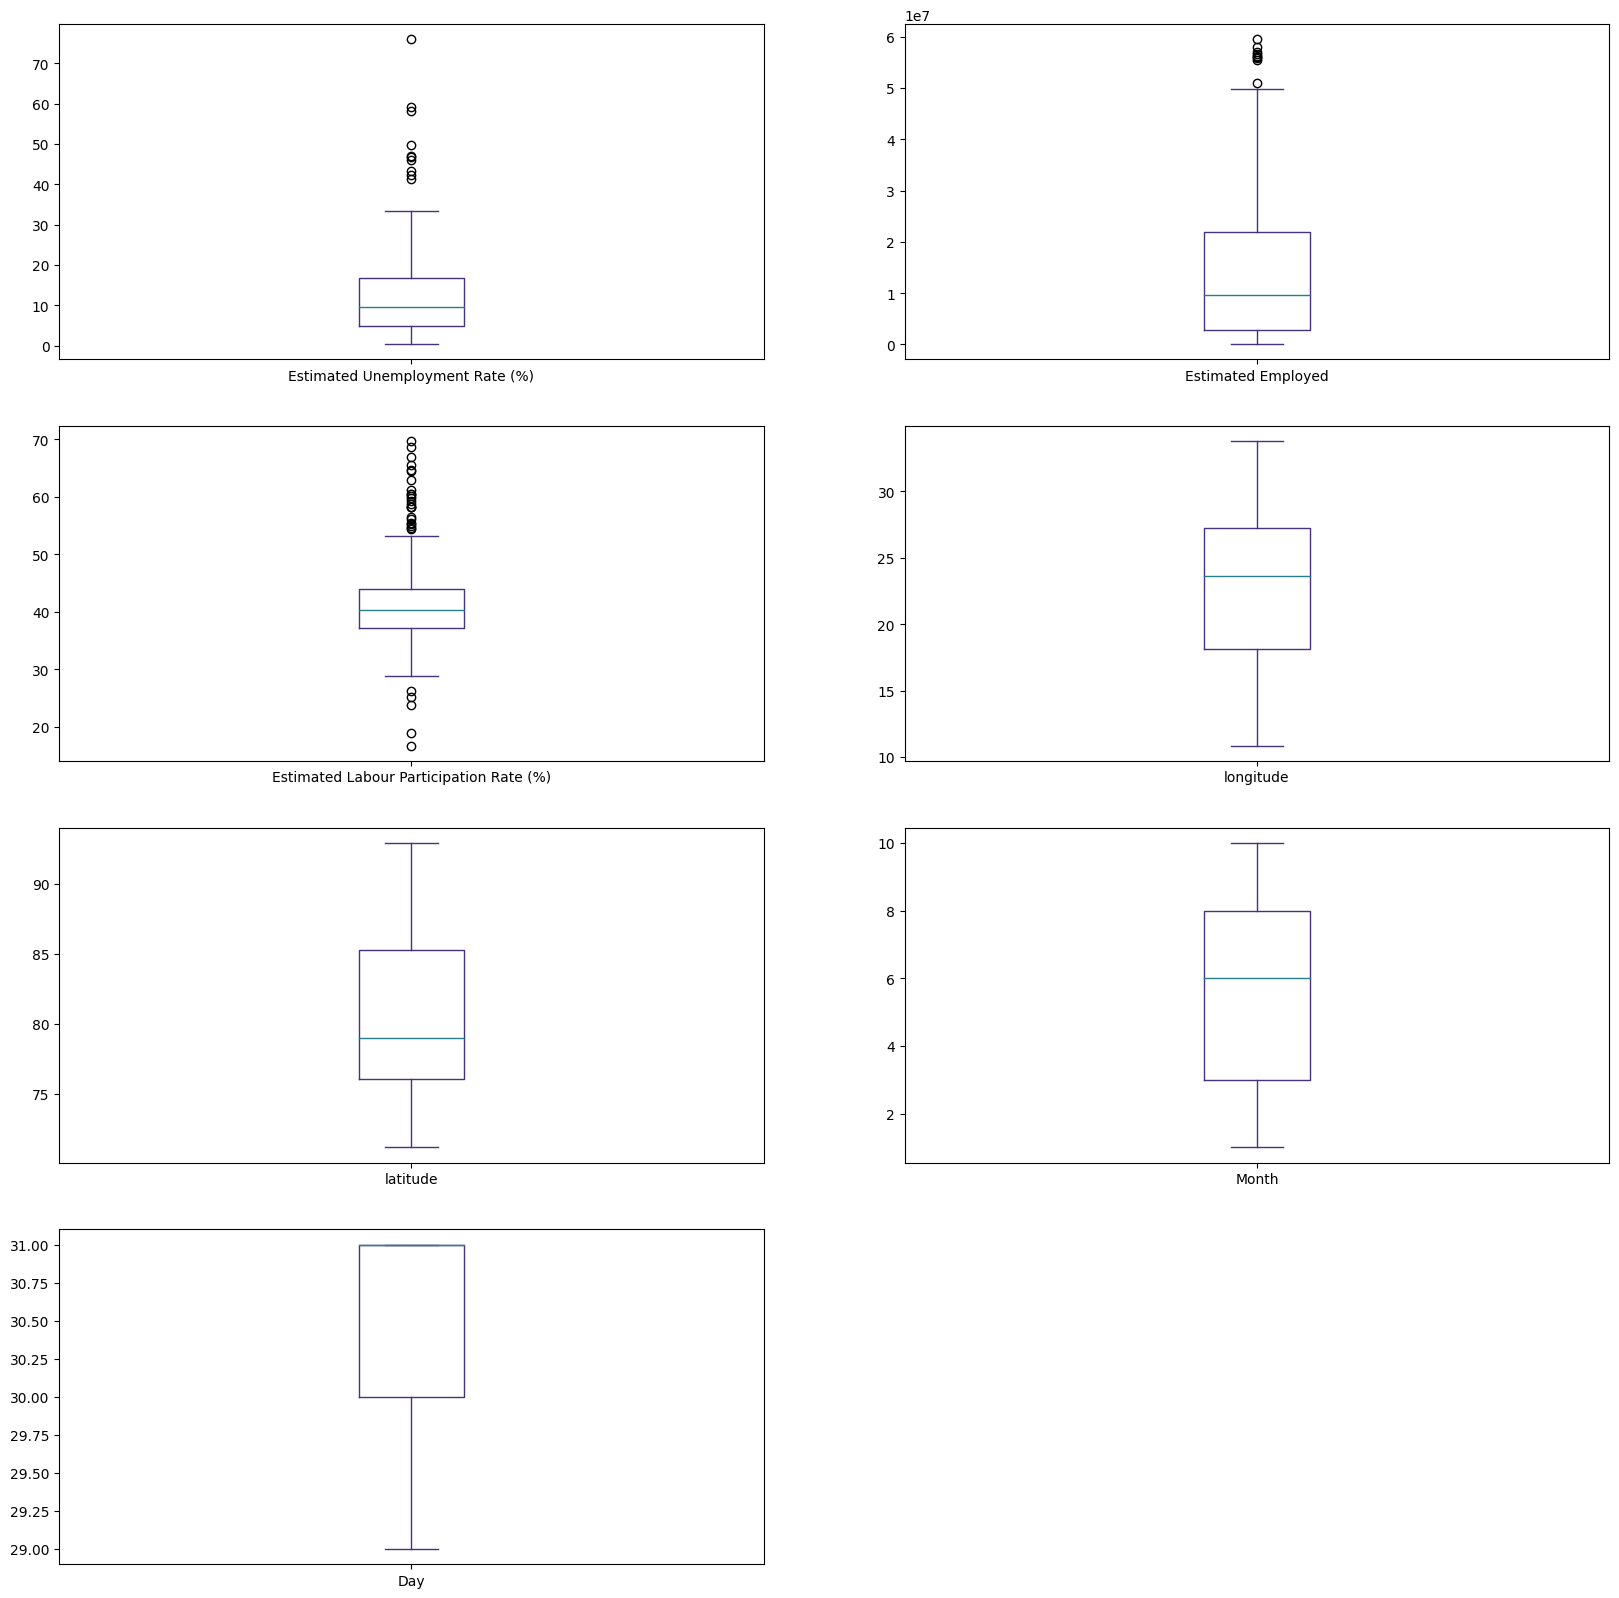

In [166]:
# Plotting BoxPlot for data
df1.plot(kind='box',subplots=True, layout=(4,2),figsize=(20,20))
plt.show()

In [167]:
# Showing Correlation
corr = df1.corr()
corr

Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Employed                                             -0.245176   
Estimated Labour Participation Rate (%)                        -0.073540   
longitude                                                       0.149976   
latitude                                                       -0.023976   
Month                                                          -0.109654   
Day                                                             0.013351   

                                         Estimated Employed  \
Estimated Unemployment Rate (%)                   -0.245176   
Estimated Employed                                 1.000000   
Estimated Labour Participation Rate (%)           -0.047948   
longitude                                         -0.113664   
latitude                                          -0.119321   
Month                                             -0.002507   
Day                                               -0.002205   

                                         Estimated Labour Participation Rate (%)  \
Estimated Unemployment Rate (%)                                        -0.073540   
Estimated Employed                                                     -0.047948   
Estimated Labour Participation Rate (%)                                 1.000000   
longitude                                                               0.080372   
latitude                                                                0.397836   
Month                                                                  -0.061983   
Day                                                                     0.029432   

                                         longitude  latitude     Month  \
Estimated Unemployment Rate (%)           0.149976 -0.023976 -0.109654   
Estimated Employed                       -0.113664 -0.119321 -0.002507   
Estimated Labour Participation Rate (%)   0.080372  0.397836 -0.061983   
longitude                                 1.000000  0.125895  0.011294   
latitude                                  0.125895  1.000000  0.013002   
Month                                     0.011294  0.013002  1.000000   
Day                                       0.009137  0.005791  0.230676   

                                              Day  
Estimated Unemployment Rate (%)          0.013351  
Estimated Employed                      -0.002205  
Estimated Labour Participation Rate (%)  0.029432  
longitude                                0.009137  
latitude                                 0.005791  
Month                                    0.230676  
Day                                      1.000000

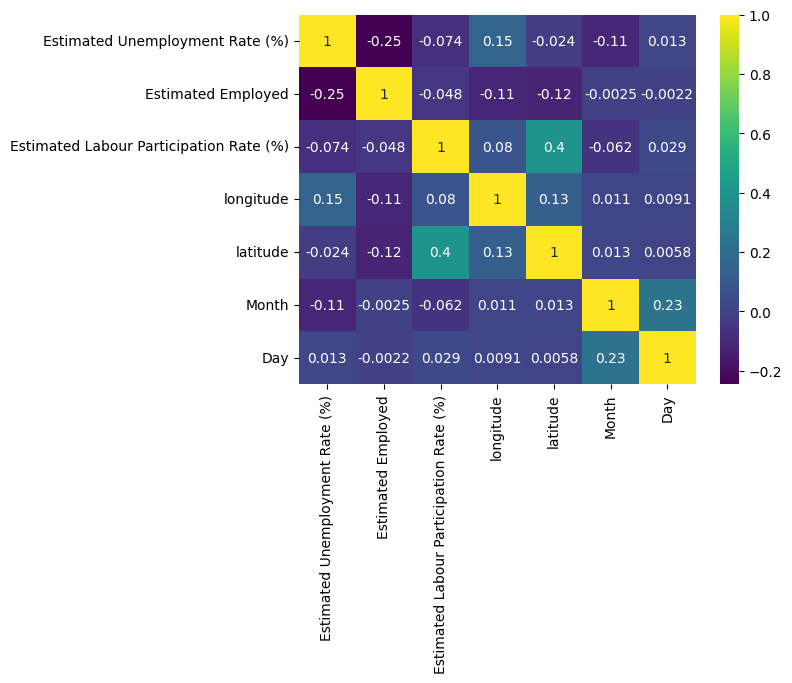

In [168]:
# Plotting Correlation PLot
sns.heatmap(corr,cmap='viridis',annot=True)
plt.show()

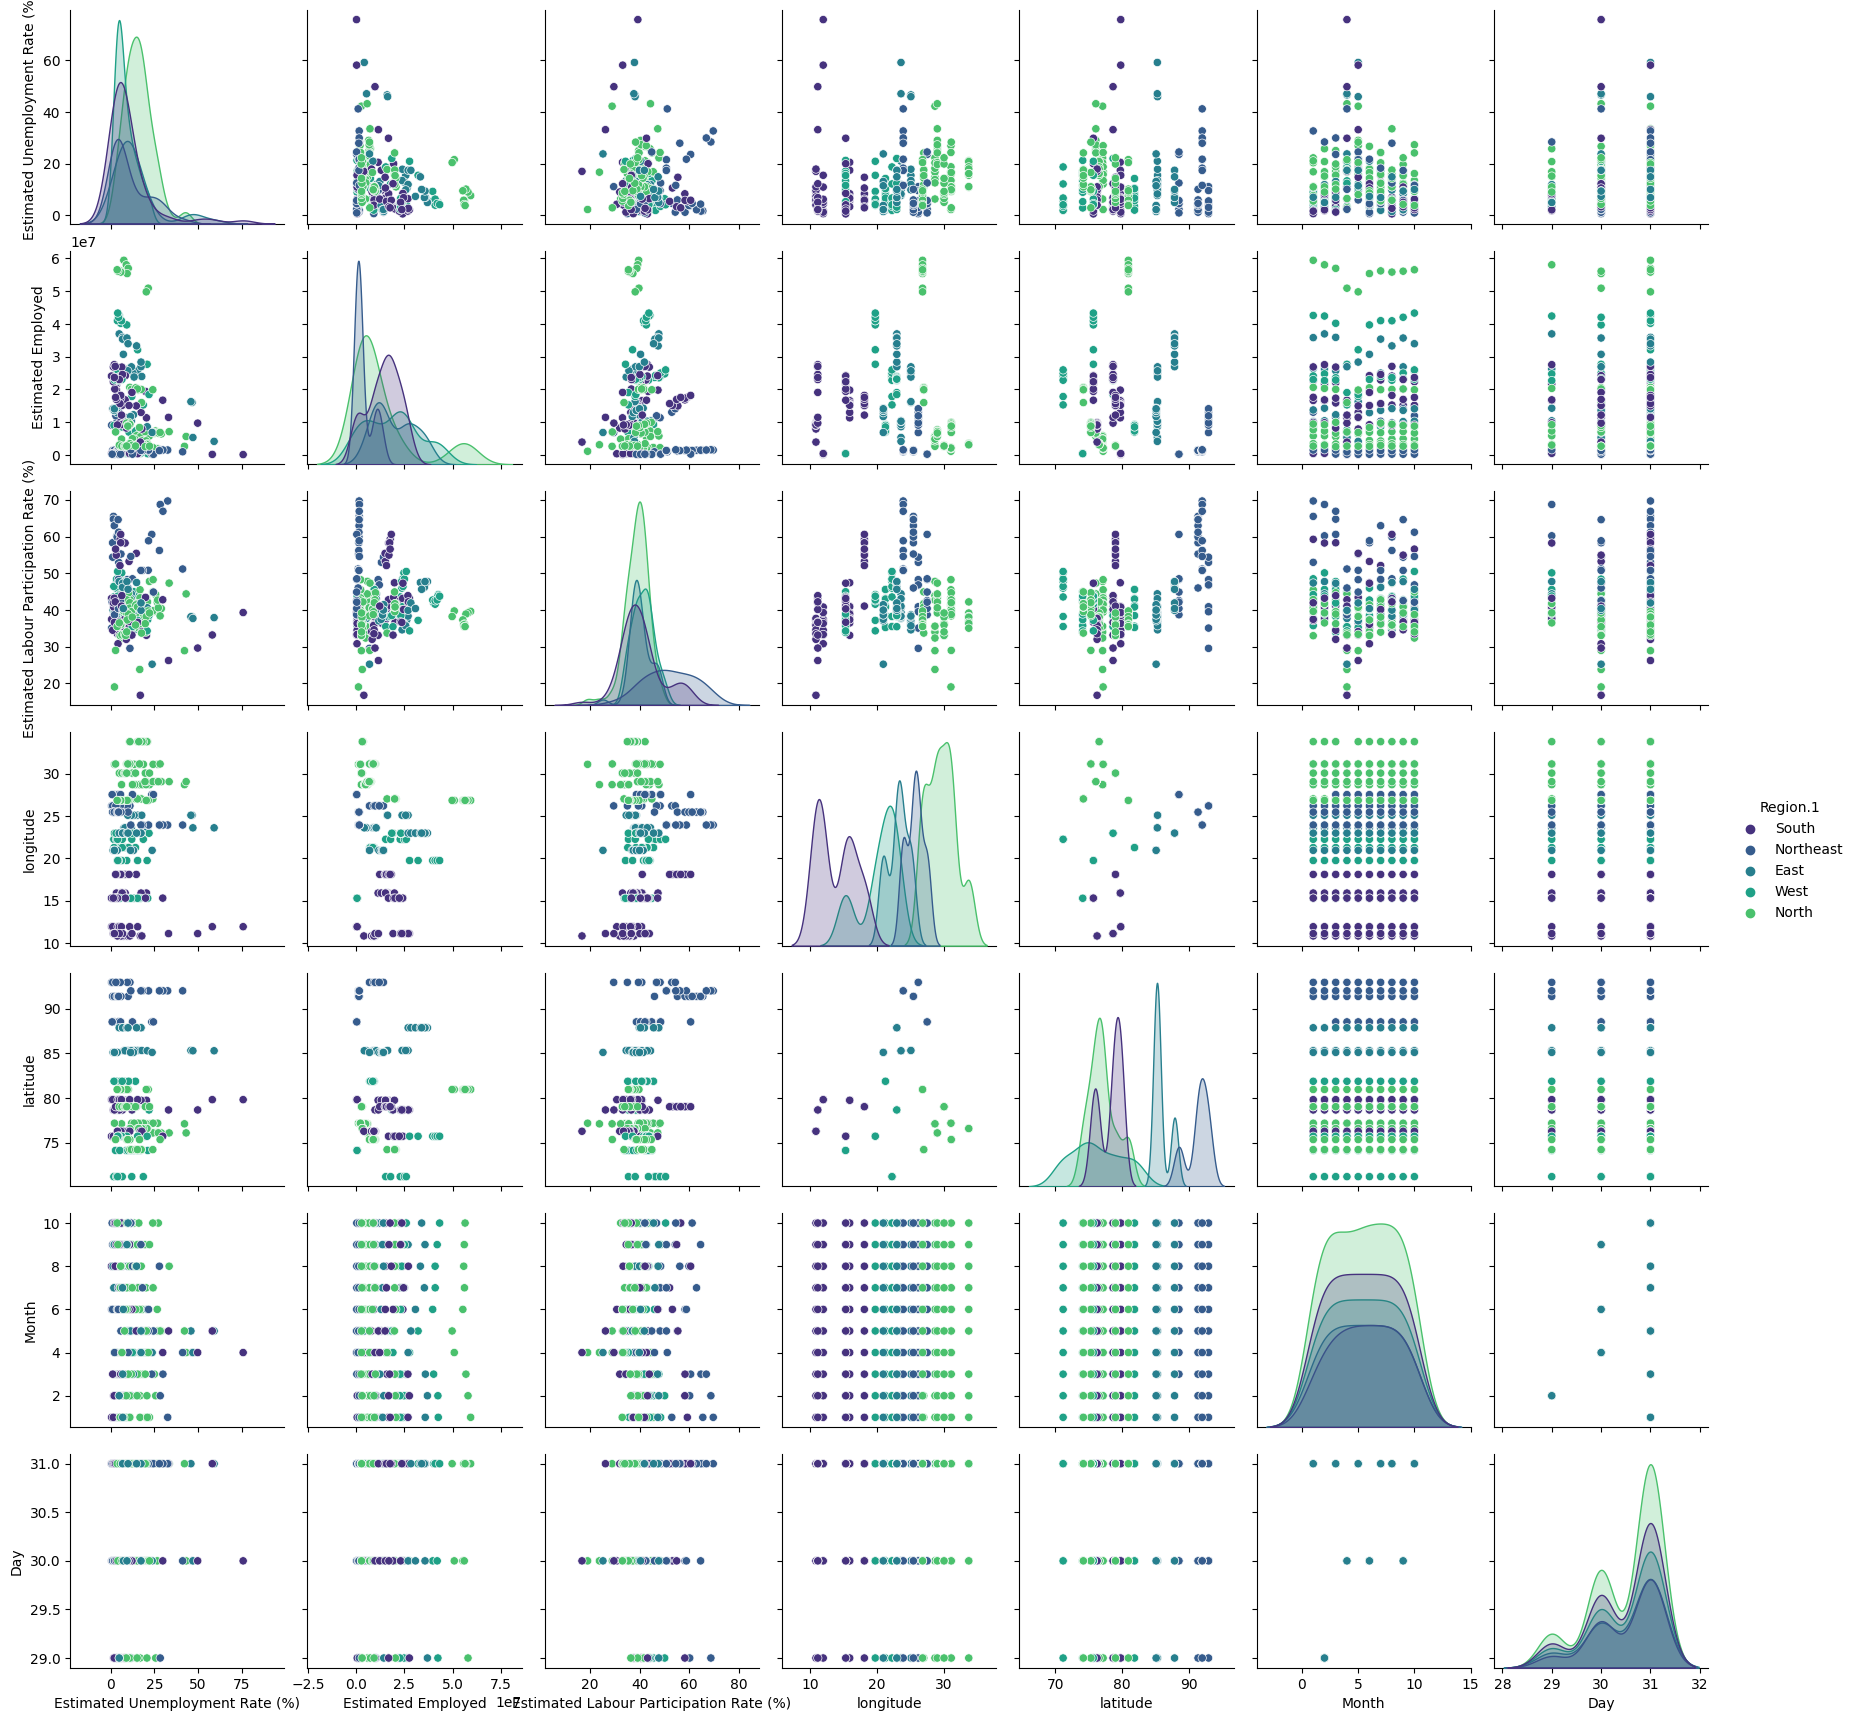

In [169]:
# showing pairplot Region.1 Wise
sns.pairplot(df1,hue='Region.1')
plt.show()

# Gathering Information
1. On December 30th, the unemployment rate is greatest.
2. The highest labour participation rate is on the 29th.
3. The most employed workers are on position 29.
4. North India has the highest rate of unemployment.
5. In Northeast India, the labour participation rate is higher.
6. Most Employed are East Indians.
7. The unemployment rate in May is the highest.
8. In January, the majority of people had jobs.
9. The lowest Labour Participation Rate is occurring in April.
10. Haryana has the highest rate of unemployment.
11. Meghalaya has a higher rate of labour participation.
12. People with jobs tend to live in Uttar Pradesh.
